##### **Incarcarea setului de date, inspectarea structuri.**
Acest bloc de cod încarcă setul de date „zoo3.csv” folosind Pandas și afișează primele rânduri pentru a verifica structura datelor.

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as ny
import matplotlib.pyplot as plt
# corelatia nu implica cauzalitate

# Load dataset
df = pd.read_csv("zoo3.csv")

# Display the first five rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
        animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0              anta     1         0     0     1         0        0         0   
1          ariranha     1         0     0     1         0        1         1   
2  boto-cor-de-rosa     0         0     0     1         0        1         1   
3             bugio     1         0     0     1         0        0         0   
4  cachorro-vinagre     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        0   
1        1         1         1         0     1     4     1         0        0   
2        1         1         1         0     1     0     1         0        0   
3        1         1         1         0     0     4     1         0        0   
4        1         1         1         0     0     4     1         0        1   

   

## Informații despre setul de date ##
Afișăm informații generale despre setul de date, inclusiv tipurile de coloane și valorile non-nule, precum și descrierea statistică sumară.

In [2]:
# Display dataset structure (column names, data types, non-null counts)
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  70 non-null     object
 1   hair         70 non-null     int64 
 2   feathers     70 non-null     int64 
 3   eggs         70 non-null     int64 
 4   milk         70 non-null     int64 
 5   airborne     70 non-null     int64 
 6   aquatic      70 non-null     int64 
 7   predator     70 non-null     int64 
 8   toothed      70 non-null     int64 
 9   backbone     70 non-null     int64 
 10  breathes     70 non-null     int64 
 11  venomous     70 non-null     int64 
 12  fins         70 non-null     int64 
 13  legs         70 non-null     int64 
 14  tail         70 non-null     int64 
 15  domestic     70 non-null     int64 
 16  catsize      70 non-null     int64 
 17  class_type   70 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 10.0+ KB
None


In [3]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            hair   feathers       eggs       milk   airborne    aquatic  \
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean    0.314286   0.285714   0.728571   0.271429   0.314286   0.328571   
std     0.467583   0.455016   0.447907   0.447907   0.467583   0.473085   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   1.000000   0.000000   0.000000   0.000000   
75%     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

        predator    toothed   backbone   breathes   venomous       fins  \
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean    0.442857   0.485714   0.871429   0.900000   0.142857   0.157143   
std     0.500310   0.503405   0.337142   0.302166   0.352454   0.366563   
min

## Verificare Valorilor lipsa ##
Verificăm dacă există valori lipsă în cadrul setului de date pentru a ne asigura că nu există probleme care să afecteze preprocesarea ulterioară.

In [4]:
# Check for missing values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64


In [5]:
print(df.columns)

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')


## Verificarea unicității etichetelor ##
Afișăm valorile unice ale coloanei class_type pentru a verifica distribuția claselor din setul de date.

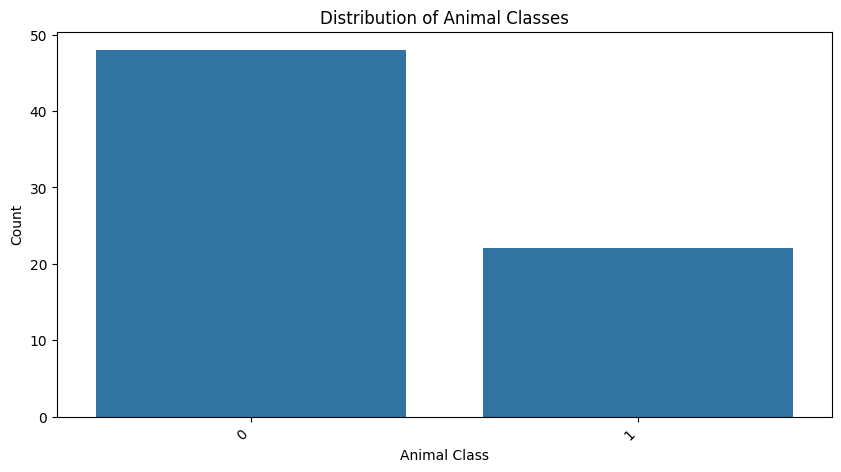

In [6]:
# Ensure the "class" column is a string type (for categorical plotting)
df["hair"] = df["hair"].astype(str)

# Get unique classes
unique_classes = df["hair"].unique()

# Set figure size
plt.figure(figsize=(max(10, len(unique_classes) * 0.8), 5))  # Adjust width dynamically

# Create the count plot
sns.countplot(x="hair", data=df, order=sorted(unique_classes))  # Sort for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels for better fit
plt.title("Distribution of Animal Classes")
plt.xlabel("Animal Class")
plt.ylabel("Count")

# Show the plot
plt.show()



 ## Vizualizarea distribuției claselor cu media și mediana ##
 Acest cod convertește etichetele claselor în format categoric, calculează frecvențele fiecărei clase și apoi le vizualizează printr-un grafic de tip bară. Sunt trasate și valorile medii și mediane pentru a evalua cât de uniformă este distribuția.

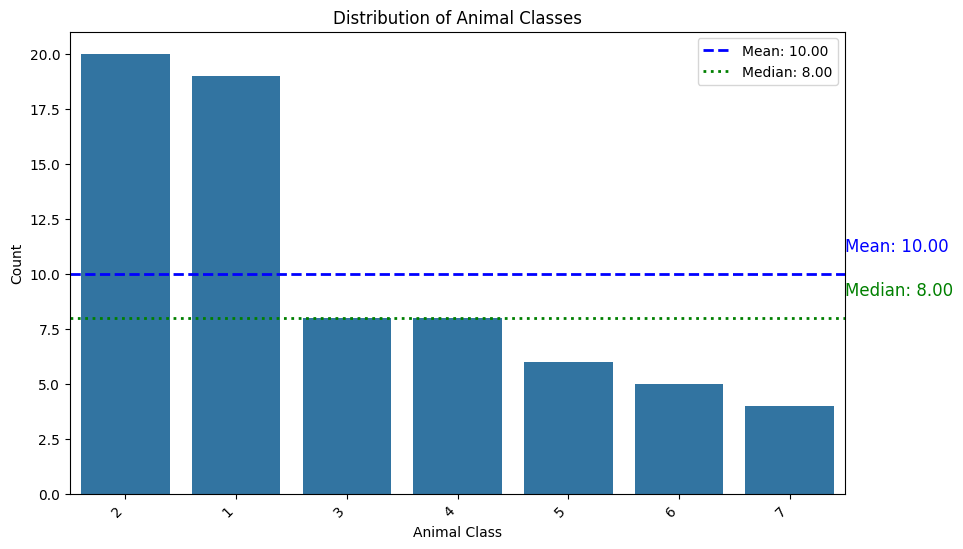

In [7]:
# Ensure "class" is treated as a categorical variable
df["class_type"] = df["class_type"].astype(str)

# Get class counts
class_counts = df["class_type"].value_counts()

# Compute Mean and Median
mean_value = class_counts.mean()
median_value = class_counts.median()

# Set figure size dynamically based on the number of classes
plt.figure(figsize=(max(10, len(class_counts) * 0.8), 6))

# Create count plot with sorted class order
ax = sns.countplot(x="class_type", data=df, order=class_counts.index)
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.title("Distribution of Animal Classes")
plt.xlabel("Animal Class")
plt.ylabel("Count")

# Draw Mean & Median as horizontal lines
plt.axhline(mean_value, color="blue", linestyle="dashed", linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axhline(median_value, color="green", linestyle="dotted", linewidth=2, label=f"Median: {median_value:.2f}")

# Annotate the mean & median values on the plot
plt.text(len(class_counts) - 0.5, mean_value + 1, f"Mean: {mean_value:.2f}", color="blue", fontsize=12)
plt.text(len(class_counts) - 0.5, median_value + 1, f"Median: {median_value:.2f}", color="green", fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.show()


## Gini Index ##
Acest bloc de cod definește o funcție pentru a calcula indicele Gini, o măsură a inegalității, și o aplică pe coloana class_type pentru a vedea cât de echilibrată este distribuția claselor.

In [8]:
# Function to calculate Gini Index
def gini_index(series):
    counts = series.value_counts(normalize=True)
    return 1 - sum(counts**2)

# Compute the Gini Index for the 'class_type' column
gini_value = gini_index(df["class_type"])
gini_value


0.8028571428571429

## Curba lui Lorenz pentru visuzalizarea gini idexului ##
Curba Lorenz este reprezentată grafic pentru a vizualiza distribuția cumulativă a claselor în raport cu o distribuție perfect egală. Acest grafic ajută la înțelegerea dezechilibrului între clase.

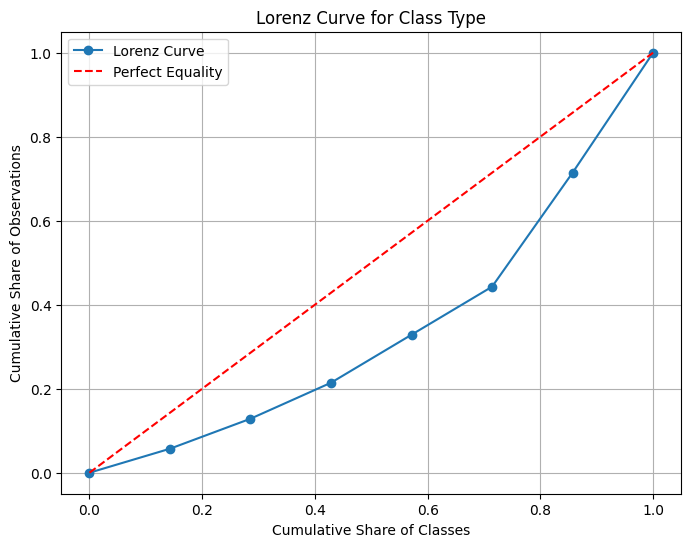

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sort values for Lorenz Curve
values = df["class_type"].value_counts().sort_values().values
cumulative_values = np.cumsum(values) / np.sum(values)
lorenz_curve = np.insert(cumulative_values, 0, 0)  

# X-axis for perfect equality
perfect_equality = np.linspace(0, 1, len(lorenz_curve))

# Plot Lorenz Curve
plt.figure(figsize=(8, 6))
plt.plot(perfect_equality, lorenz_curve, marker='o', label="Lorenz Curve")
plt.plot(perfect_equality, perfect_equality, linestyle="--", color='r', label="Perfect Equality")
plt.xlabel("Cumulative Share of Classes")
plt.ylabel("Cumulative Share of Observations")
plt.title("Lorenz Curve for Class Type")
plt.legend()
plt.grid(True)
plt.show()



Information Gain for each feature (ranked):
legs: 1.1039
feathers: 0.5983
milk: 0.5847
eggs: 0.5847
toothed: 0.5179
airborne: 0.5017
hair: 0.4788
backbone: 0.3837
tail: 0.3624
aquatic: 0.3427
fins: 0.3165
breathes: 0.2820
catsize: 0.1668
venomous: 0.1393
predator: 0.0509
domestic: 0.0317


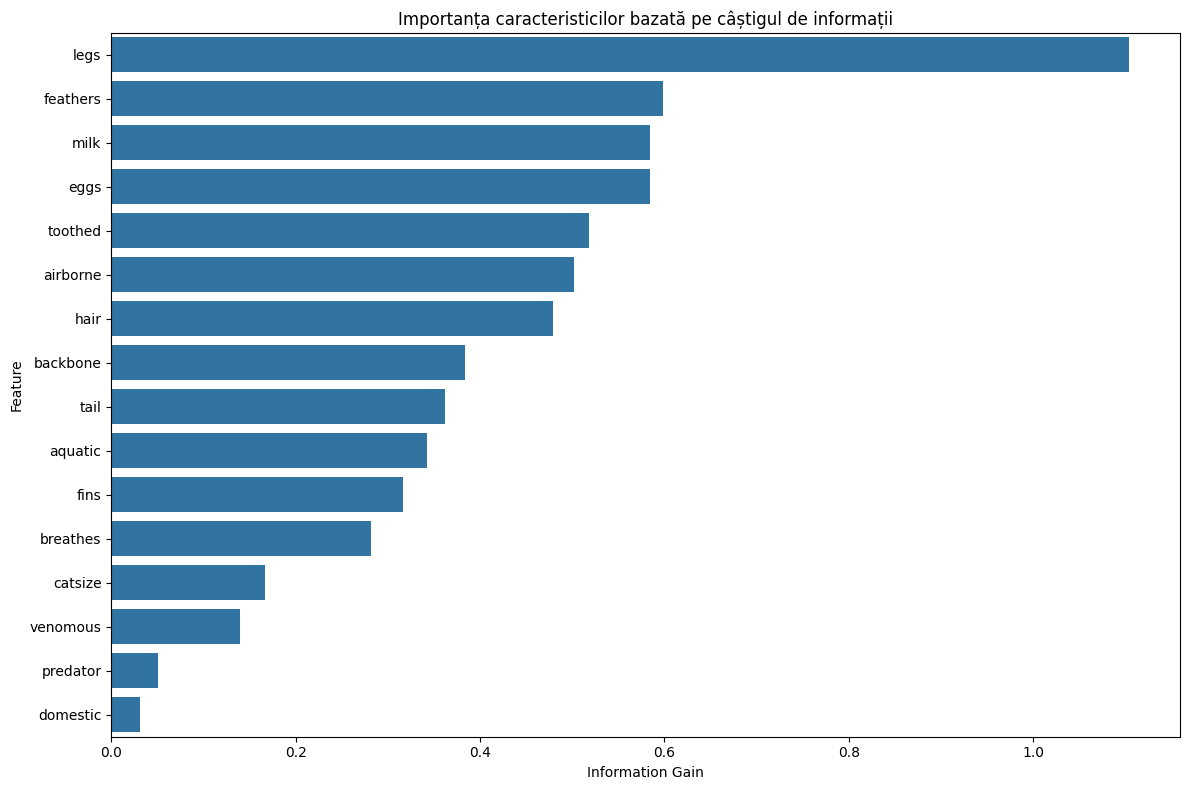


Feature distributions by class:

Class 1 - Mammals:
Animals: anta (Tapir), ariranha (Giant Otter), boto-cor-de-rosa (Pink River Dolphin)... (total: 19)
  legs: 3.68
  feathers: 0.00
  milk: 1.00
  eggs: 0.00
  toothed: 0.95

Class 2 - Birds:
Animals: aguia-cinzenta (Gray Eagle), aracari-banana (Toucanet), arara-azul (Blue Macaw)... (total: 20)
  legs: 2.00
  feathers: 1.00
  milk: 0.00
  eggs: 1.00
  toothed: 0.00

Class 3 - Reptiles:
Animals: cobra-cipo (Vine Snake), jabuti (Red-footed Tortoise), jacare-coroa (Yacare Caiman)... (total: 8)
  legs: 1.50
  feathers: 0.00
  milk: 0.00
  eggs: 1.00
  toothed: 0.75

Class 4 - Fish:
Animals: baiacu (Pufferfish), cascudinho-de-caverna (Cave Catfish), lambari (Tetra)... (total: 8)
  legs: 0.00
  feathers: 0.00
  milk: 0.00
  eggs: 1.00
  toothed: 1.00

Class 5 - Amphibians:
Animals: perereca-de-alcatrazes (Alcatrazes Treefrog), ra-flecha-azul (Blue Poison Dart Frog), ra-pimenta (Pepper Frog)... (total: 6)
  legs: 4.00
  feathers: 0.00
  milk:

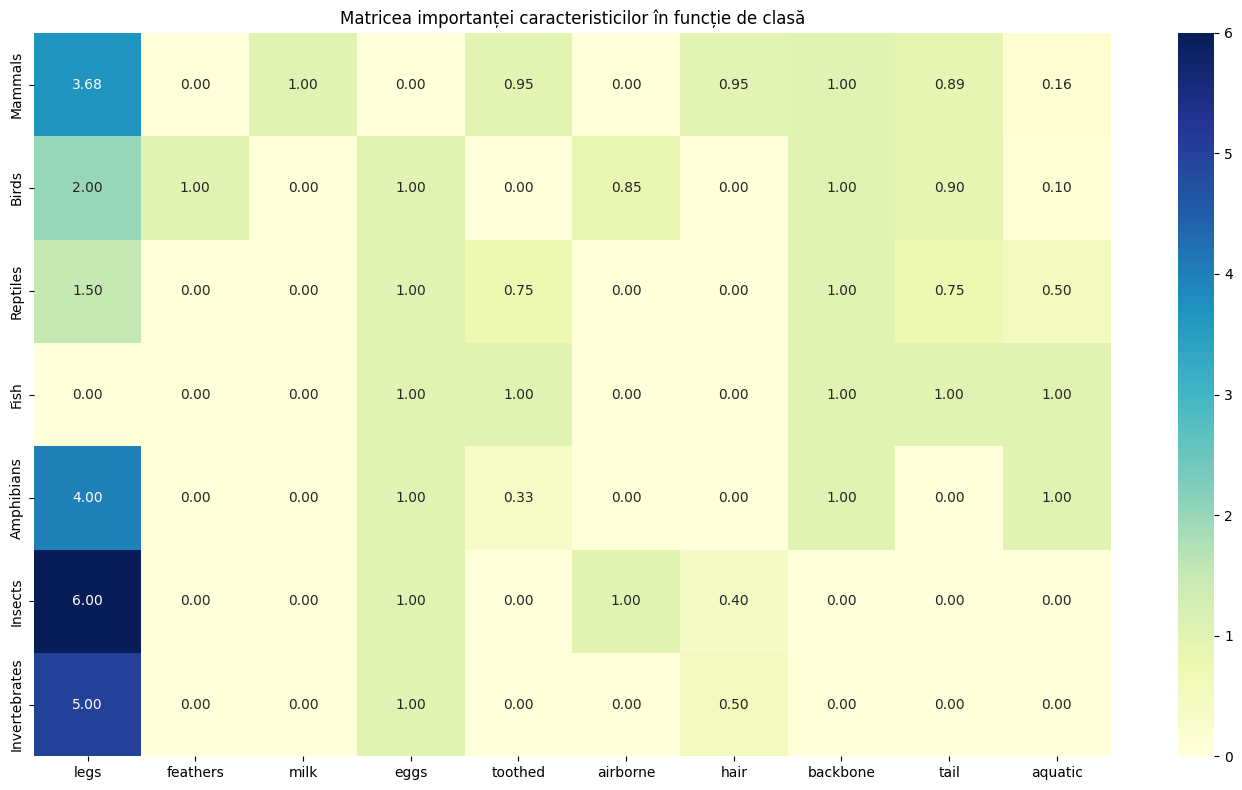

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided text
data = """animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chimpanze,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1
gato-maracaja,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
jaguatirica,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
lobo-guara,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
macaco-aranha,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
macaco-barrigudo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
mico-leao-dourado,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
mono-carvoeiro,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
onca-pintada,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
orangotango,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
peixe-boi,1,0,0,1,0,1,0,1,1,1,0,1,2,1,0,0,1
queixada,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
tamandua-bandeira,1,0,0,1,0,0,0,0,1,1,0,0,4,1,0,0,1
urso-de-oculos,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,0,1
aguia-cinzenta,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
aracari-banana,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
arara-azul,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
arara-caninde,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
chaua,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,1,2
ema,0,1,1,0,0,0,0,0,1,1,0,0,2,0,0,0,2
gaviao-pombo,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
guara,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
harpia,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
jacurutu,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
jacutinga,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
jandaia-amarela,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
macuco,0,1,1,0,0,0,0,0,1,1,0,0,2,0,0,1,2
murucututu,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
mutum,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2
papagaio-de-cara-roxa,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,1,2
pato-de-crista,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
pavo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
tucano-de-bico-preto,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
urubu-rei,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
cobra-cipo,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
jabuti,0,0,1,0,0,1,0,0,1,1,0,0,4,0,1,1,3
jacare-coroa,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,3
jararaca-ilhoa,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
jiboia,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
sucuri,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,3
tracaja,0,0,1,0,0,1,0,0,1,1,0,0,4,0,1,0,3
urutu-cruzeiro,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
baiacu,0,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,4
cascudinho-de-caverna,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
lambari,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
matrinxa,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
pirarucu,0,0,1,0,0,1,1,1,1,1,0,1,0,1,0,0,4
raia-chita,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
tambaqui,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
tubarao-raposa,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
perereca-de-alcatrazes,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5
ra-flecha-azul,0,0,1,0,0,1,0,0,1,1,1,0,4,0,0,0,5
ra-pimenta,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5
sapo-barriga-de-fogo,0,0,1,0,0,1,0,0,1,1,0,0,4,0,1,0,5
sapo-cururu,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
sapo-de-chifre,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,1,5
abelha,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
joaninha,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
mariposa,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
pirilampo,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7
sauva-limao,1,0,1,0,0,0,1,0,0,1,1,0,6,0,0,0,7"""

# Create a pandas DataFrame
rows = [row.split(',') for row in data.strip().split('\n')]
headers = rows[0]
df = pd.DataFrame(rows[1:], columns=headers)

# Convert all columns except 'animal_name' to numeric
for col in df.columns:
    if col != 'animal_name':
        df[col] = pd.to_numeric(df[col])

# Animal name translations
animal_translations = {
    'anta': 'Tapir',
    'ariranha': 'Giant Otter',
    'boto-cor-de-rosa': 'Pink River Dolphin',
    'bugio': 'Howler Monkey',
    'cachorro-vinagre': 'Bush Dog',
    'chimpanze': 'Chimpanzee',
    'gato-maracaja': 'Margay Cat',
    'jaguatirica': 'Ocelot',
    'lobo-guara': 'Maned Wolf',
    'macaco-aranha': 'Spider Monkey',
    'macaco-barrigudo': 'Woolly Monkey',
    'mico-leao-dourado': 'Golden Lion Tamarin',
    'mono-carvoeiro': 'Muriqui Monkey',
    'onca-pintada': 'Jaguar',
    'orangotango': 'Orangutan',
    'peixe-boi': 'Manatee',
    'queixada': 'White-lipped Peccary',
    'tamandua-bandeira': 'Giant Anteater',
    'urso-de-oculos': 'Spectacled Bear',
    'aguia-cinzenta': 'Gray Eagle',
    'aracari-banana': 'Toucanet',
    'arara-azul': 'Blue Macaw',
    'arara-caninde': 'Blue-and-yellow Macaw',
    'chaua': 'Blue-headed Parrot',
    'ema': 'Greater Rhea',
    'gaviao-pombo': 'Gray Hawk',
    'guara': 'Scarlet Ibis',
    'harpia': 'Harpy Eagle',
    'jacurutu': 'Great Horned Owl',
    'jacutinga': 'Black-fronted Piping Guan',
    'jandaia-amarela': 'Sun Parakeet',
    'macuco': 'Solitary Tinamou',
    'murucututu': 'Spectacled Owl',
    'mutum': 'Curassow',
    'papagaio-de-cara-roxa': 'Red-tailed Amazon',
    'pato-de-crista': 'Crested Duck',
    'pavo': 'Peacock',
    'tucano-de-bico-preto': 'Black-billed Toucan',
    'urubu-rei': 'King Vulture',
    'cobra-cipo': 'Vine Snake',
    'jabuti': 'Red-footed Tortoise',
    'jacare-coroa': 'Yacare Caiman',
    'jararaca-ilhoa': 'Golden Lancehead',
    'jiboia': 'Boa Constrictor',
    'sucuri': 'Anaconda',
    'tracaja': 'Amazon River Turtle',
    'urutu-cruzeiro': 'South American Rattlesnake',
    'baiacu': 'Pufferfish',
    'cascudinho-de-caverna': 'Cave Catfish',
    'lambari': 'Tetra',
    'matrinxa': 'Brycon Fish',
    'pirarucu': 'Arapaima',
    'raia-chita': 'Spotted Eagle Ray',
    'tambaqui': 'Freshwater Pacu',
    'tubarao-raposa': 'Thresher Shark',
    'perereca-de-alcatrazes': 'Alcatrazes Treefrog',
    'ra-flecha-azul': 'Blue Poison Dart Frog',
    'ra-pimenta': 'Pepper Frog',
    'sapo-barriga-de-fogo': 'Fire-bellied Toad',
    'sapo-cururu': 'Cane Toad',
    'sapo-de-chifre': 'Horned Frog',
    'abelha': 'Bee',
    'joaninha': 'Ladybug',
    'mariposa': 'Moth',
    'pirilampo': 'Firefly',
    'vespa': 'Wasp',
    'bicho-pau': 'Stick Insect',
    'caracol-da-mata-atlantica': 'Atlantic Forest Snail',
    'caranguejeira': 'Tarantula',
    'sauva-limao': 'Leafcutter Ant'
}

# # Add English translations as comments
# print("Animal translations:")
# for pt, en in animal_translations.items():
#     print(f"{pt} -> {en}")

# Map class_type to descriptive names
class_names = {
    1: 'Mammals',
    2: 'Birds',
    3: 'Reptiles',
    4: 'Fish',
    5: 'Amphibians',
    6: 'Insects',
    7: 'Invertebrates'
}

# Calculate Information Gain using mutual_info_classif
feature_cols = [col for col in df.columns if col not in ['animal_name', 'class_type']]
X = df[feature_cols]
y = df['class_type']

# Calculate information gain for each feature
info_gain = mutual_info_classif(X, y, discrete_features=True)
feature_importance = pd.DataFrame({'feature': feature_cols, 'info_gain': info_gain})
feature_importance = feature_importance.sort_values('info_gain', ascending=False)

print("\nInformation Gain for each feature (ranked):")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['info_gain']:.4f}")

# Visualize information gain
plt.figure(figsize=(12, 8))
sns.barplot(x='info_gain', y='feature', data=feature_importance)
plt.title('Importanța caracteristicilor bazată pe câștigul de informații')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Analyze feature distributions by class
print("\nFeature distributions by class:")
df['class_name'] = df['class_type'].map(class_names)

# Create summary of key features by class
class_summary = {}
for class_id, class_name in class_names.items():
    class_data = df[df['class_type'] == class_id]
    class_features = {}
    for feature in feature_importance['feature'][:5]:  # Top 5 features
        class_features[feature] = class_data[feature].mean()
    class_summary[class_name] = class_features
    
    print(f"\nClass {class_id} - {class_name}:")
    animals = class_data['animal_name'].tolist()
    animals_en = [f"{animal} ({animal_translations.get(animal, 'Unknown')})" for animal in animals]
    print(f"Animals: {', '.join(animals_en[:3])}... (total: {len(animals)})")
    
    for feature, value in class_features.items():
        print(f"  {feature}: {value:.2f}")
        
# Generate feature importance by class heatmap
top_features = feature_importance['feature'][:10].tolist()  # Top 10 features

# Initialize with float data type explicitly
feature_class_matrix = pd.DataFrame(0.0, index=class_names.values(), columns=top_features)

# Fill the matrix with mean values for each feature per class
for class_id, class_name in class_names.items():
    class_data = df[df['class_type'] == class_id]
    for feature in top_features:
        # Convert to numeric explicitly before calculating mean
        feature_class_matrix.loc[class_name, feature] = pd.to_numeric(class_data[feature]).mean()

# Verify the data types
print("\nFeature matrix data types before plotting:")
print(feature_class_matrix.dtypes)

# Ensure all values are float
feature_class_matrix = feature_class_matrix.astype(float)

plt.figure(figsize=(14, 8))
sns.heatmap(feature_class_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Matricea importanței caracteristicilor în funcție de clasă')
plt.tight_layout()
plt.show()

## Matricea de Corelatie ##


Top Positive Correlations:
hair and milk: 0.8324
milk and hair: 0.8324
feathers and airborne: 0.7298
airborne and feathers: 0.7298
aquatic and fins: 0.6172
fins and aquatic: 0.6172
backbone and tail: 0.5867
tail and backbone: 0.5867
milk and toothed: 0.5638
toothed and milk: 0.5638

Top Negative Correlations:
toothed and feathers: -0.6146
feathers and toothed: -0.6146
toothed and airborne: -0.6579
airborne and toothed: -0.6579
fins and breathes: -0.7720
breathes and fins: -0.7720
hair and eggs: -0.8324
eggs and hair: -0.8324
eggs and milk: -1.0000
milk and eggs: -1.0000


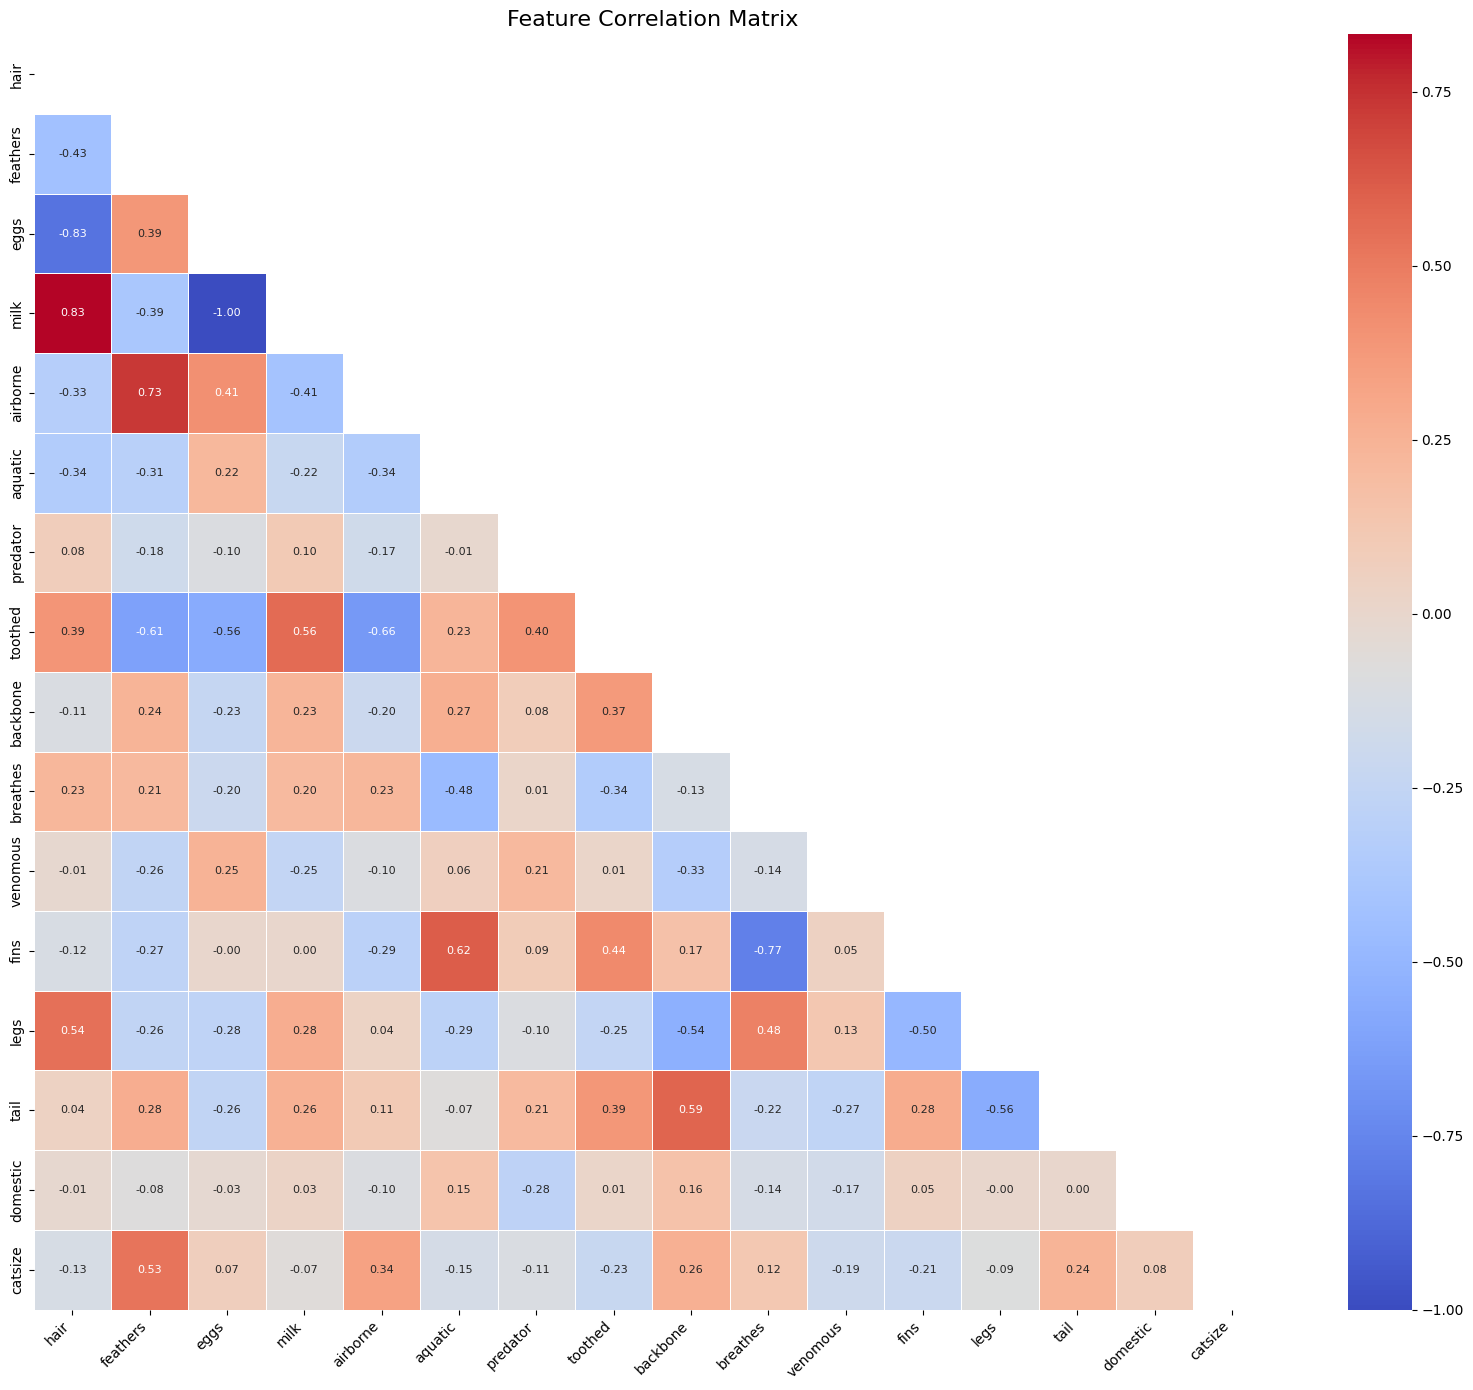


Feature correlation with class_type:
eggs: 0.6312
venomous: 0.4666
aquatic: 0.2367
legs: 0.2292
fins: 0.0662
airborne: 0.0033
predator: -0.0610
domestic: -0.0667
breathes: -0.1996
feathers: -0.3098
catsize: -0.3149
toothed: -0.3205
hair: -0.3316
milk: -0.6312
tail: -0.6634
backbone: -0.7410


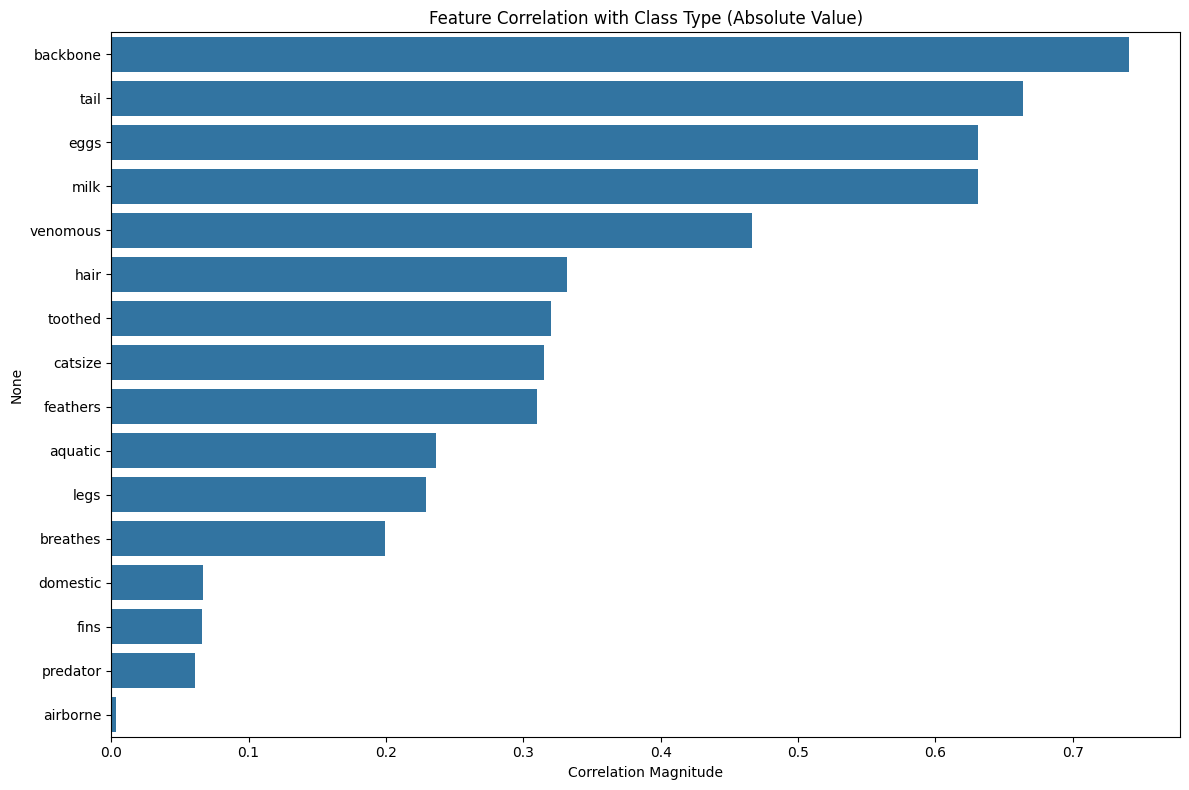

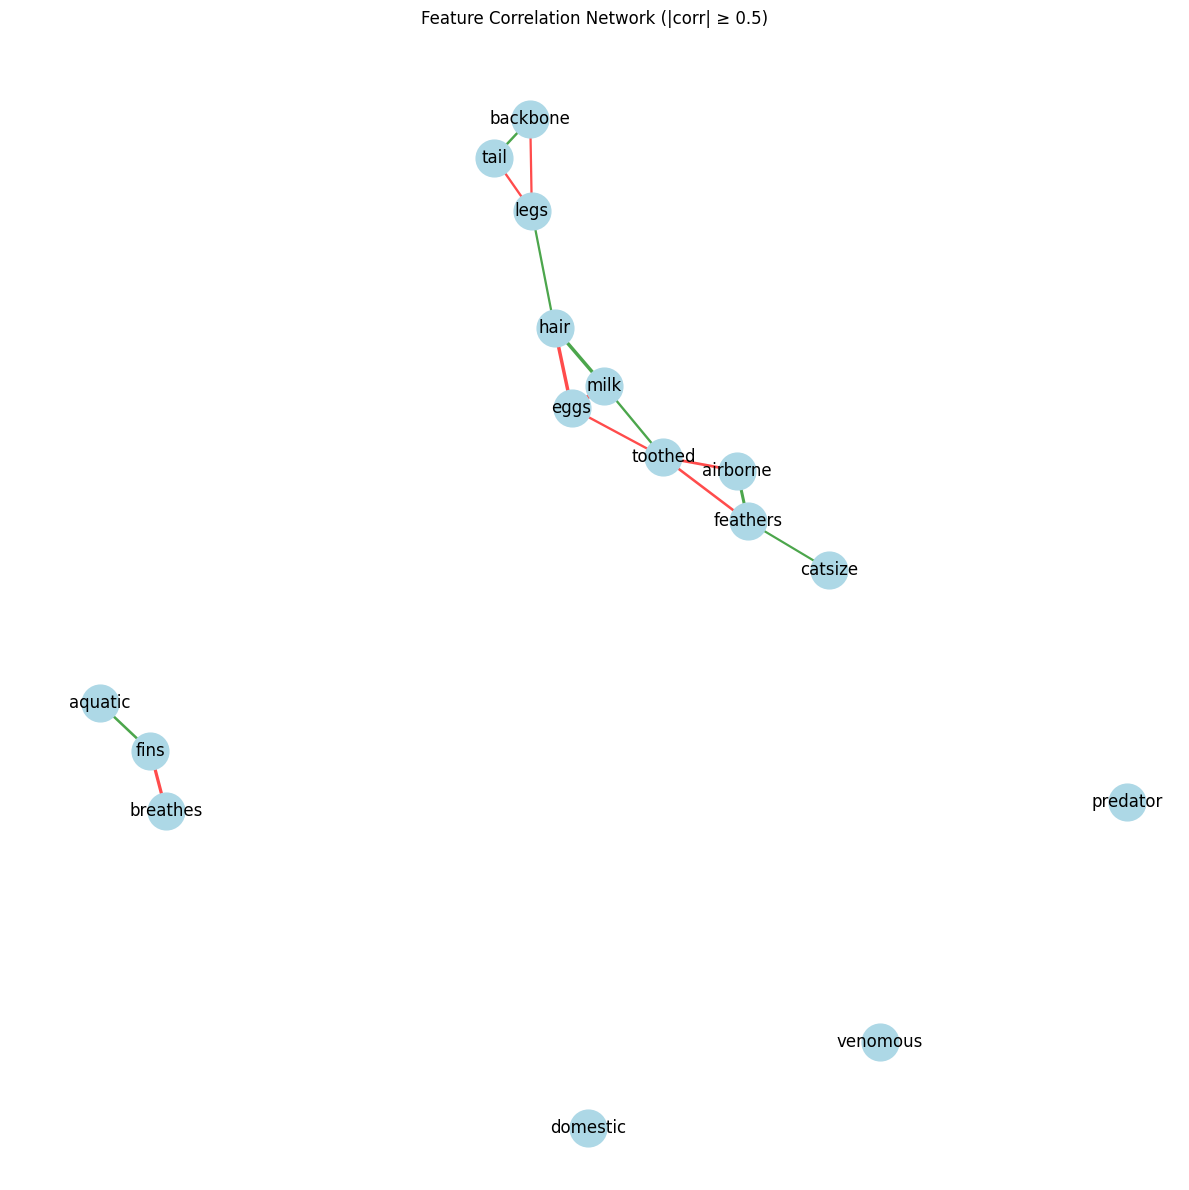

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided text
data = """animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chimpanze,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1
gato-maracaja,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
jaguatirica,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
lobo-guara,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
macaco-aranha,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
macaco-barrigudo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
mico-leao-dourado,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
mono-carvoeiro,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
onca-pintada,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
orangotango,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
peixe-boi,1,0,0,1,0,1,0,1,1,1,0,1,2,1,0,0,1
queixada,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
tamandua-bandeira,1,0,0,1,0,0,0,0,1,1,0,0,4,1,0,0,1
urso-de-oculos,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,0,1
aguia-cinzenta,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
aracari-banana,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
arara-azul,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
arara-caninde,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
chaua,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,1,2
ema,0,1,1,0,0,0,0,0,1,1,0,0,2,0,0,0,2
gaviao-pombo,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
guara,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
harpia,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
jacurutu,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
jacutinga,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
jandaia-amarela,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
macuco,0,1,1,0,0,0,0,0,1,1,0,0,2,0,0,1,2
murucututu,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
mutum,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2
papagaio-de-cara-roxa,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,1,2
pato-de-crista,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
pavo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
tucano-de-bico-preto,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
urubu-rei,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
cobra-cipo,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
jabuti,0,0,1,0,0,1,0,0,1,1,0,0,4,0,1,1,3
jacare-coroa,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,3
jararaca-ilhoa,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
jiboia,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
sucuri,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,3
tracaja,0,0,1,0,0,1,0,0,1,1,0,0,4,0,1,0,3
urutu-cruzeiro,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
baiacu,0,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,4
cascudinho-de-caverna,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
lambari,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
matrinxa,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
pirarucu,0,0,1,0,0,1,1,1,1,1,0,1,0,1,0,0,4
raia-chita,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
tambaqui,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
tubarao-raposa,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
perereca-de-alcatrazes,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5
ra-flecha-azul,0,0,1,0,0,1,0,0,1,1,1,0,4,0,0,0,5
ra-pimenta,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5
sapo-barriga-de-fogo,0,0,1,0,0,1,0,0,1,1,0,0,4,0,1,0,5
sapo-cururu,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
sapo-de-chifre,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,1,5
abelha,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
joaninha,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
mariposa,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
pirilampo,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7
sauva-limao,1,0,1,0,0,0,1,0,0,1,1,0,6,0,0,0,7"""

# Create a pandas DataFrame
rows = [row.split(',') for row in data.strip().split('\n')]
headers = rows[0]
df = pd.DataFrame(rows[1:], columns=headers)

# Convert all columns except 'animal_name' to numeric
for col in df.columns:
    if col != 'animal_name':
        df[col] = pd.to_numeric(df[col])

# Map class_type to descriptive names
class_names = {
    1: 'Mammals',
    2: 'Birds',
    3: 'Reptiles',
    4: 'Fish',
    5: 'Amphibians', 
    6: 'Insects',
    7: 'Invertebrates'
}

df['class_name'] = df['class_type'].map(class_names)

# Calculate correlation matrix (excluding non-numeric columns)
feature_cols = [col for col in df.columns if col not in ['animal_name', 'class_name', 'class_type']]
correlation_matrix = df[feature_cols].corr()

# Display the top positive and negative correlations
correlations = correlation_matrix.unstack().sort_values(ascending=False)
correlations = correlations[correlations < 1.0]  # Remove self-correlations

print("\nTop Positive Correlations:")
for idx, (features, corr_value) in enumerate(correlations.head(10).items()):
    print(f"{features[0]} and {features[1]}: {corr_value:.4f}")

print("\nTop Negative Correlations:")
for idx, (features, corr_value) in enumerate(correlations.tail(10).items()):
    print(f"{features[0]} and {features[1]}: {corr_value:.4f}")

# Plot the correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            fmt='.2f',
            annot_kws={"size": 8})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Feature correlation with class_type
class_corr = df[feature_cols + ['class_type']].corr()['class_type'].drop('class_type')

# Fixed line: No 'by' parameter needed for Series.sort_values()
class_corr = class_corr.sort_values(ascending=False)

print("\nFeature correlation with class_type:")
for feature, corr in class_corr.items():
    print(f"{feature}: {corr:.4f}")

# Visualize feature importance by class
plt.figure(figsize=(12, 8))
# Fixed line: No 'by' parameter needed for Series.sort_values()
correlation_with_class = abs(class_corr).sort_values(ascending=False)
sns.barplot(x=correlation_with_class.values, y=correlation_with_class.index)
plt.title('Feature Correlation with Class Type (Absolute Value)')
plt.xlabel('Correlation Magnitude')
plt.tight_layout()
plt.show()

# Create a correlation network visualization for the strongest correlations
import networkx as nx

plt.figure(figsize=(12, 12))
G = nx.Graph()

# Add nodes for each feature
for feature in feature_cols:
    G.add_node(feature)

# Add edges for strong correlations (positive or negative)
threshold = 0.5
for i, feature1 in enumerate(feature_cols):
    for feature2 in feature_cols[i+1:]:
        corr = correlation_matrix.loc[feature1, feature2]
        if abs(corr) >= threshold:
            G.add_edge(feature1, feature2, weight=abs(corr), 
                       color='green' if corr > 0 else 'red',
                       width=abs(corr) * 3)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]
widths = [G[u][v]['width'] for u, v in edges]

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=colors, width=widths, alpha=0.7)

plt.title('Feature Correlation Network (|corr| ≥ 0.5)')
plt.axis('off')
plt.tight_layout()
plt.show()

## Entropie ##

Dataset shape: (70, 18)

Class distribution:
Class 2: 20 animals (0.286)
Class 1: 19 animals (0.271)
Class 3: 8 animals (0.114)
Class 4: 8 animals (0.114)
Class 5: 6 animals (0.086)
Class 6: 5 animals (0.071)
Class 7: 4 animals (0.057)

Entropy of the class distribution: 2.5540 bits


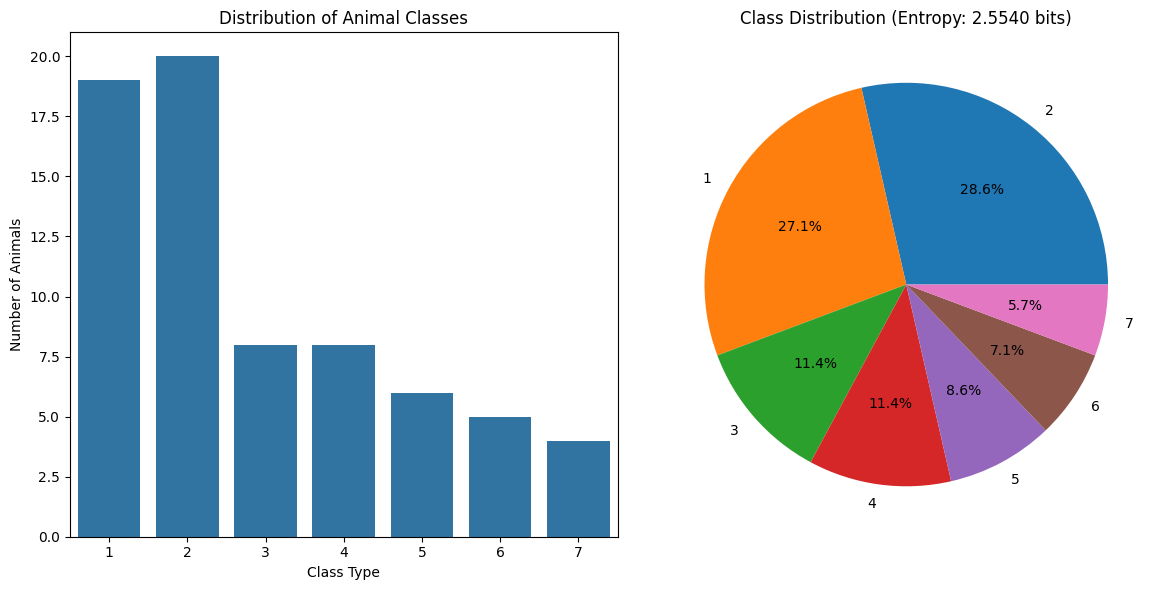


Entropy contribution of each feature:
------------------------------------
hair: 0.8981 bits
feathers: 0.8631 bits
eggs: 0.8435 bits
milk: 0.8435 bits
airborne: 0.8981 bits
aquatic: 0.9135 bits
predator: 0.9906 bits
toothed: 0.9994 bits
backbone: 0.5535 bits
breathes: 0.4690 bits
venomous: 0.5917 bits
fins: 0.6274 bits
legs: 1.9478 bits
tail: 0.8813 bits
domestic: 0.5917 bits
catsize: 0.8981 bits


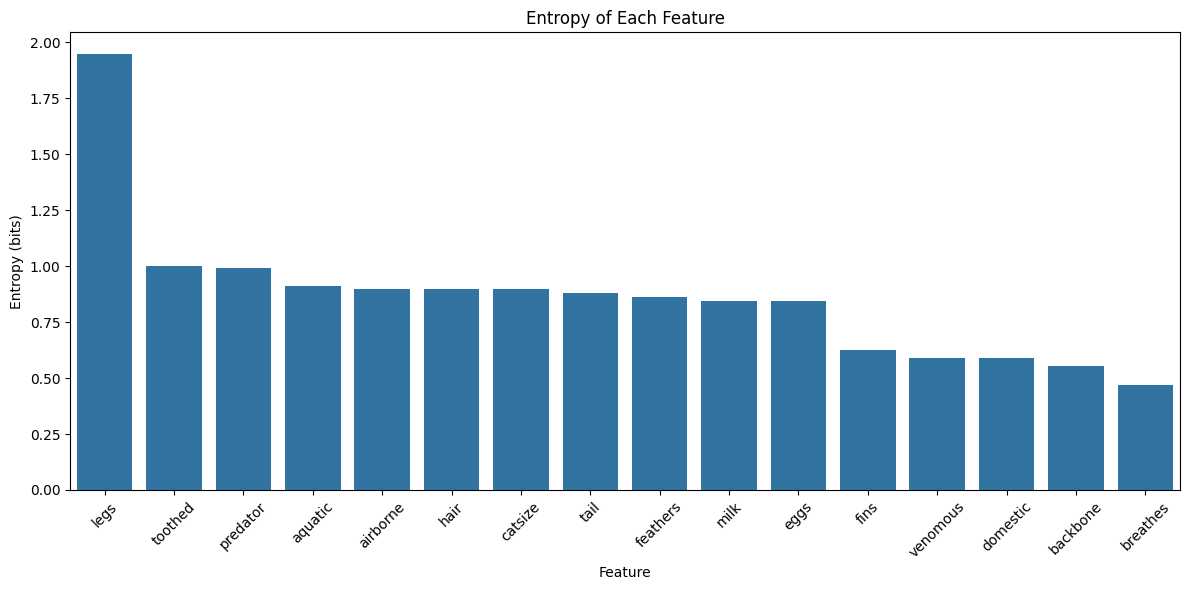


Information Gain for each feature:
------------------------------------
hair: 0.6908 bits
feathers: 0.8631 bits
eggs: 0.8435 bits
milk: 0.8435 bits
airborne: 0.7238 bits
aquatic: 0.4944 bits
predator: 0.0735 bits
toothed: 0.7472 bits
backbone: 0.5535 bits
breathes: 0.4069 bits
venomous: 0.2010 bits
fins: 0.4566 bits
legs: 1.5927 bits
tail: 0.5228 bits
domestic: 0.0457 bits
catsize: 0.2406 bits


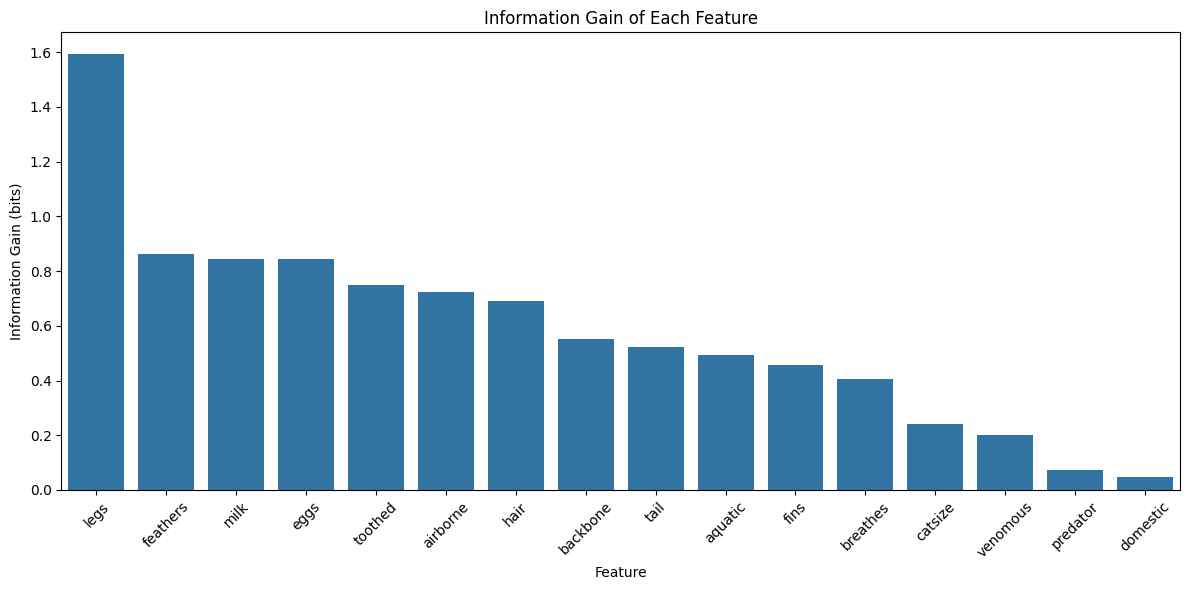

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log2
from io import StringIO

# Load the dataset
# Assuming you have the file locally. If not, you'll need to adjust the path.
# Using StringIO to handle the CSV data that might be pasted directly into the notebook
csv_data = """animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chimpanze,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1
gato-maracaja,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
jaguatirica,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
lobo-guara,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
macaco-aranha,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
macaco-barrigudo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
mico-leao-dourado,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
mono-carvoeiro,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
onca-pintada,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
orangotango,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
peixe-boi,1,0,0,1,0,1,0,1,1,1,0,1,2,1,0,0,1
queixada,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
tamandua-bandeira,1,0,0,1,0,0,0,0,1,1,0,0,4,1,0,0,1
urso-de-oculos,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,0,1
aguia-cinzenta,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
aracari-banana,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
arara-azul,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
arara-caninde,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
chaua,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,1,2
ema,0,1,1,0,0,0,0,0,1,1,0,0,2,0,0,0,2
gaviao-pombo,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
guara,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
harpia,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
jacurutu,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
jacutinga,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
jandaia-amarela,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
macuco,0,1,1,0,0,0,0,0,1,1,0,0,2,0,0,1,2
murucututu,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
mutum,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2
papagaio-de-cara-roxa,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,1,2
pato-de-crista,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
pavo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
tucano-de-bico-preto,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
urubu-rei,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
cobra-cipo,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
jabuti,0,0,1,0,0,1,0,0,1,1,0,0,4,0,1,1,3
jacare-coroa,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,3
jararaca-ilhoa,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
jiboia,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
sucuri,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,3
tracaja,0,0,1,0,0,1,0,0,1,1,0,0,4,0,1,0,3
urutu-cruzeiro,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
baiacu,0,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,4
cascudinho-de-caverna,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
lambari,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
matrinxa,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
pirarucu,0,0,1,0,0,1,1,1,1,1,0,1,0,1,0,0,4
raia-chita,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
tambaqui,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
tubarao-raposa,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
perereca-de-alcatrazes,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5
ra-flecha-azul,0,0,1,0,0,1,0,0,1,1,1,0,4,0,0,0,5
ra-pimenta,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5
sapo-barriga-de-fogo,0,0,1,0,0,1,0,0,1,1,0,0,4,0,1,0,5
sapo-cururu,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
sapo-de-chifre,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,1,5
abelha,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
joaninha,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
mariposa,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
pirilampo,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7
sauva-limao,1,0,1,0,0,0,1,0,0,1,1,0,6,0,0,0,7"""

# Read the CSV data
df = pd.read_csv(StringIO(csv_data))

# Function to calculate entropy
def calculate_entropy(labels):
    """
    Calculate the entropy of a label distribution
    """
    # Count occurrences of each class
    value_counts = labels.value_counts()
    
    # Calculate probabilities
    probabilities = value_counts / len(labels)
    
    # Calculate entropy
    entropy = -sum(p * log2(p) for p in probabilities)
    
    return entropy, value_counts, probabilities

# Calculate entropy for class_type
entropy, class_counts, class_probabilities = calculate_entropy(df['class_type'])

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nClass distribution:")
for class_id, count in class_counts.items():
    print(f"Class {class_id}: {count} animals ({class_probabilities[class_id]:.3f})")

print(f"\nEntropy of the class distribution: {entropy:.4f} bits")

# Create a DataFrame for the probabilities for better visualization
prob_df = pd.DataFrame({
    'Class': class_probabilities.index,
    'Probability': class_probabilities.values,
    'Count': class_counts.values
})
prob_df = prob_df.sort_values('Class')

# Visualize the class distribution
plt.figure(figsize=(12, 6))

# Bar plot of class distribution
plt.subplot(1, 2, 1)
sns.barplot(x='Class', y='Count', data=prob_df)
plt.title('Distribution of Animal Classes')
plt.xlabel('Class Type')
plt.ylabel('Number of Animals')

# Pie chart of class probabilities
plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title(f'Class Distribution (Entropy: {entropy:.4f} bits)')

plt.tight_layout()
plt.show()

# Calculate entropy for each feature
print("\nEntropy contribution of each feature:")
print("------------------------------------")
feature_entropies = {}

for feature in df.columns:
    if feature not in ['animal_name', 'class_type']:
        feature_entropy, _, _ = calculate_entropy(df[feature])
        feature_entropies[feature] = feature_entropy
        print(f"{feature}: {feature_entropy:.4f} bits")

# Sort features by entropy and visualize
feature_entropy_df = pd.DataFrame({
    'Feature': feature_entropies.keys(),
    'Entropy': feature_entropies.values()
}).sort_values('Entropy', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Entropy', data=feature_entropy_df)
plt.title('Entropy of Each Feature')
plt.xlabel('Feature')
plt.ylabel('Entropy (bits)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate information gain for each feature
print("\nInformation Gain for each feature:")
print("------------------------------------")
information_gains = {}

for feature in df.columns:
    if feature not in ['animal_name', 'class_type']:
        # Calculate conditional entropy
        conditional_entropy = 0
        feature_values = df[feature].unique()
        
        for value in feature_values:
            subset = df[df[feature] == value]
            subset_prob = len(subset) / len(df)
            subset_entropy, _, _ = calculate_entropy(subset['class_type'])
            conditional_entropy += subset_prob * subset_entropy
        
        # Information gain = entropy(parent) - weighted_sum(entropy(children))
        info_gain = entropy - conditional_entropy
        information_gains[feature] = info_gain
        print(f"{feature}: {info_gain:.4f} bits")

# Sort features by information gain and visualize
info_gain_df = pd.DataFrame({
    'Feature': information_gains.keys(),
    'Information Gain': information_gains.values()
}).sort_values('Information Gain', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Information Gain', data=info_gain_df)
plt.title('Information Gain of Each Feature')
plt.xlabel('Feature')
plt.ylabel('Information Gain (bits)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Random Forest Algoritm

Dataset Overview:
Shape: (70, 18)

Class distribution:
class_type
2    20
1    19
3     8
4     8
5     6
6     5
7     4
Name: count, dtype: int64

First 5 rows:
        animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0              anta     1         0     0     1         0        0         0   
1          ariranha     1         0     0     1         0        1         1   
2  boto-cor-de-rosa     0         0     0     1         0        1         1   
3             bugio     1         0     0     1         0        0         0   
4  cachorro-vinagre     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        0   
1        1         1         1         0     1     4     1         0        0   
2        1         1         1         0     1     0     1         0        0   
3        1         1         1  

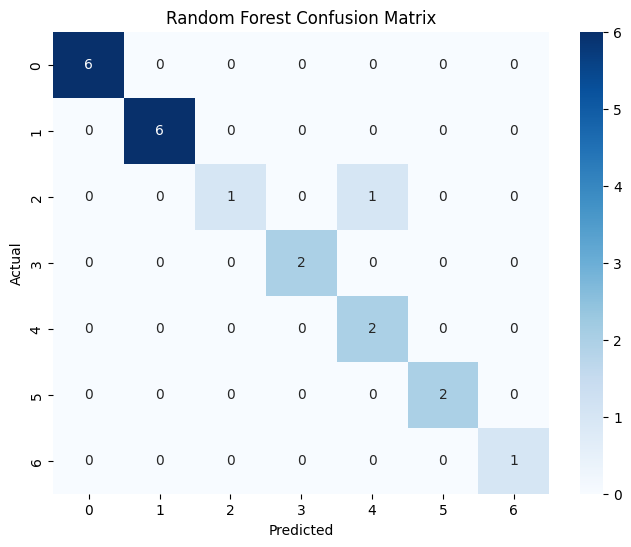

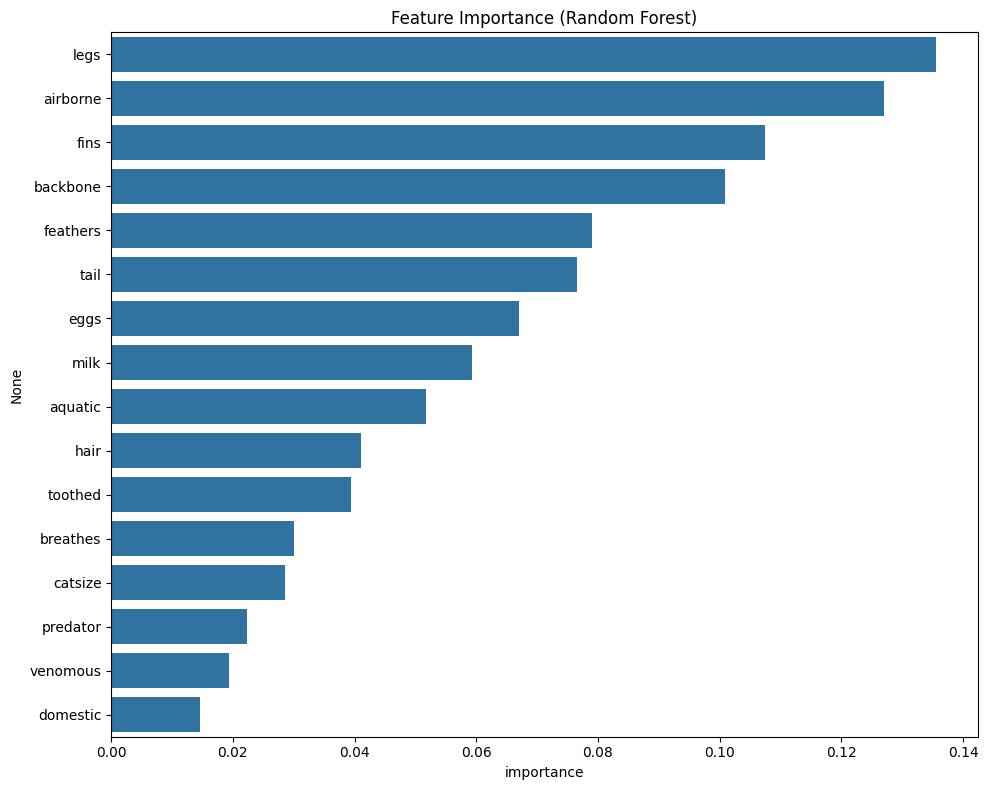

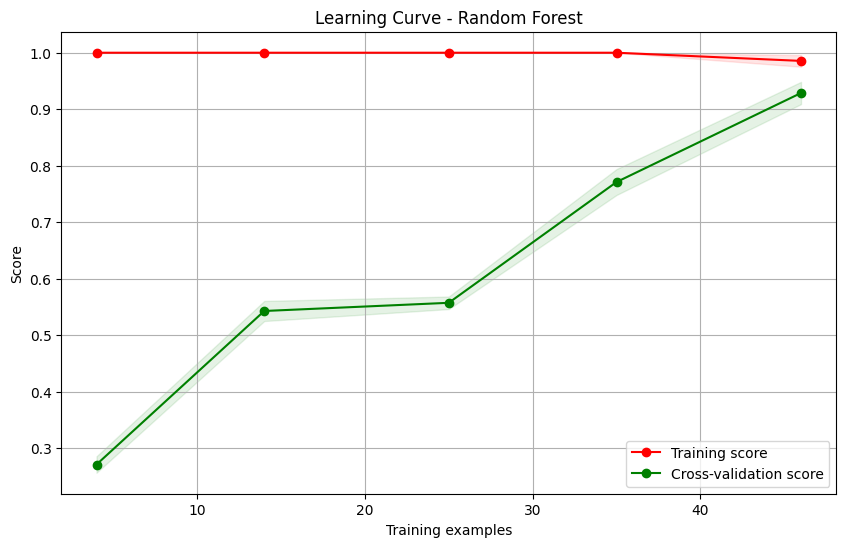


Random Forest model saved as 'random_forest_zoo_model.pkl'


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load data
data = pd.read_csv('zoo3.csv')

# Explore the dataset
print("Dataset Overview:")
print(f"Shape: {data.shape}")
print("\nClass distribution:")
print(data['class_type'].value_counts())

# Display first few rows
print("\nFirst 5 rows:")
print(data.head())

# Split features and target
X = data.drop(['animal_name', 'class_type'], axis=1)
y = data['class_type']

# Split data into training and test sets with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTraining data class distribution before oversampling:")
print(pd.Series(y_train).value_counts())

# Use RandomOverSampler instead of SMOTE for small classes
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("\nTraining data class distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest with class weighting
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Use StratifiedKFold with fewer splits than the smallest class size
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with stratified cross-validation
print("\nTraining Random Forest with GridSearchCV...")
rf_grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=rf_param_grid,
    cv=skf,  # Use stratified k-fold
    n_jobs=-1, 
    scoring='accuracy'
)

# Train on the resampled data
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Get best model
best_rf = rf_grid_search.best_estimator_
print(f"\nBest parameters: {rf_grid_search.best_params_}")

# Evaluate on test set
rf_y_pred = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.4f}")

# Classification report with zero_division parameter to handle the warning
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred, zero_division=0))

# Cross-validation score with stratification
rf_cv_scores = cross_val_score(best_rf, X, y, cv=skf, scoring='accuracy')
print(f"\nStratified {skf.n_splits}-fold cross-validation accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

# Create confusion matrix
plt.figure(figsize=(8, 6))
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot feature importance
feature_importances = pd.DataFrame(
    best_rf.feature_importances_,
    index=X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

# Updated learning curve function with stratification
def plot_learning_curve(estimator, X, y, cv=None):
    if cv is None:
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve - Random Forest")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve with stratified CV
plot_learning_curve(best_rf, X, y, cv=skf)

# Save the model
import joblib
joblib.dump(best_rf, 'random_forest_zoo_model.pkl')
print("\nRandom Forest model saved as 'random_forest_zoo_model.pkl'")

## Support Vector Machine ##

Dataset Overview:
Shape: (70, 18)

Class distribution:
class_type
2    20
1    19
3     8
4     8
5     6
6     5
7     4
Name: count, dtype: int64
        animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0              anta     1         0     0     1         0        0         0   
1          ariranha     1         0     0     1         0        1         1   
2  boto-cor-de-rosa     0         0     0     1         0        1         1   
3             bugio     1         0     0     1         0        0         0   
4  cachorro-vinagre     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        0   
1        1         1         1         0     1     4     1         0        0   
2        1         1         1         0     1     0     1         0        0   
3        1         1         1         0     0 

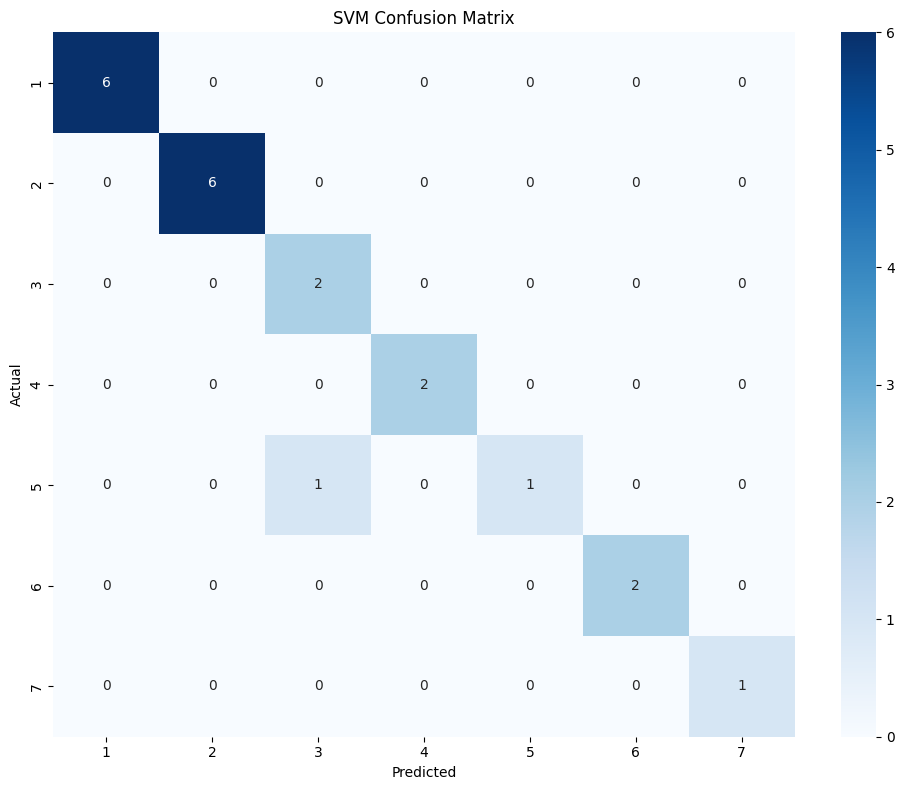

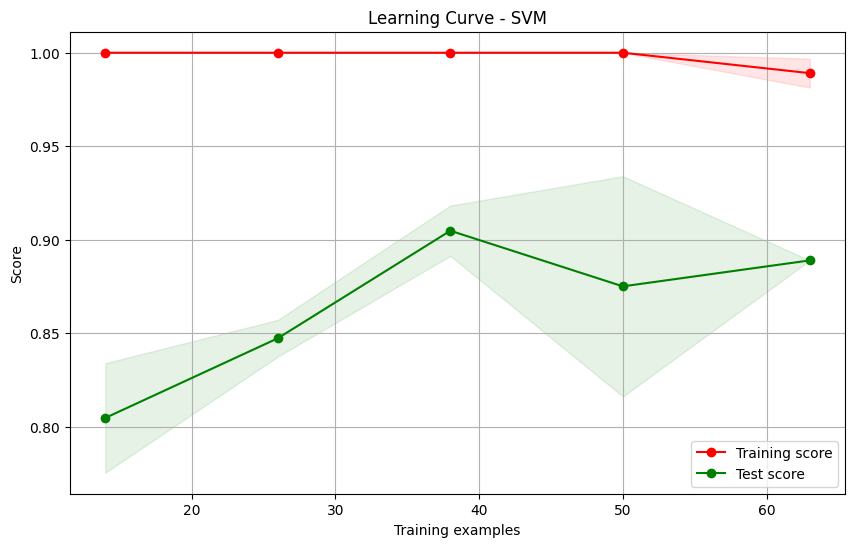

SVM model saved as 'svm_zoo_model.pkl'
Scaler saved as 'svm_scaler.pkl'

Example: Using the model to predict an animal class
Predicted class for example animal: 1


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load data
data = pd.read_csv('zoo3.csv')

# Explore the dataset
print("Dataset Overview:")
print(f"Shape: {data.shape}")
print("\nClass distribution:")
class_distribution = data['class_type'].value_counts()
print(class_distribution)

# Display first few rows
display = data.head()
print(display)

# Check for classes with very few samples (potential issue for cross-validation)
print("\nChecking for rare classes:")
rare_classes = class_distribution[class_distribution < 3].index.tolist()
if rare_classes:
    print(f"Warning: Classes with fewer than 3 samples: {rare_classes}")
    print("These classes may cause issues with cross-validation.")
    
    # Option 1: Remove rare classes
    print(f"Removing classes with fewer than 3 samples for model stability.")
    data = data[~data['class_type'].isin(rare_classes)]
    print(f"New shape after removing rare classes: {data.shape}")
    print(f"New class distribution:\n{data['class_type'].value_counts()}")

# Split features and target
X = data.drop(['animal_name', 'class_type'], axis=1)
y = data['class_type']

# Split data into training and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# Check class distribution after splitting
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts())

# Define a smaller parameter grid to reduce computational burden
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1],
    'kernel': ['rbf', 'poly']
}

# Initialize SVC with class_weight='balanced' to handle class imbalance
svm = SVC(random_state=42, class_weight='balanced')

# Use a very small number of folds to ensure each fold has multiple examples from each class
# Check the smallest class count and adjust accordingly
min_class_count = pd.Series(y_train).value_counts().min()
n_splits = min(min_class_count - 1, 3)  # Ensure at least one sample per class in each fold
if n_splits < 2:
    n_splits = 2  # Minimum is 2-fold CV
    
print(f"Using {n_splits}-fold cross-validation (based on smallest class size of {min_class_count})")
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create a function to check if fold split will work
def check_fold_viability(X, y, cv):
    viable = True
    for train_idx, test_idx in cv.split(X, y):
        y_train_fold = y.iloc[train_idx] if isinstance(y, pd.Series) else y[train_idx]
        y_test_fold = y.iloc[test_idx] if isinstance(y, pd.Series) else y[test_idx]
        
        if len(np.unique(y_train_fold)) < 2 or len(np.unique(y_test_fold)) < 2:
            viable = False
            break
    return viable

# Check if our CV strategy will work
if not check_fold_viability(X_train_scaled, y_train, cv):
    print("Warning: CV strategy will still result in some folds with only one class.")
    print("Switching to a simpler approach with manual validation instead of cross-validation.")
    
    # Use a simpler approach: just one train/validation split
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train_scaled, y_train, test_size=0.25, random_state=42, stratify=y_train)
    
    best_score = 0
    best_params = {}
    best_model = None
    
    # Manual grid search
    print("Performing manual grid search...")
    for kernel in svm_param_grid['kernel']:
        for C in svm_param_grid['C']:
            for gamma in svm_param_grid['gamma']:
                try:
                    model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42, class_weight='balanced')
                    model.fit(X_train_sub, y_train_sub)
                    score = accuracy_score(y_val, model.predict(X_val))
                    
                    if score > best_score:
                        best_score = score
                        best_params = {'kernel': kernel, 'C': C, 'gamma': gamma}
                        best_model = model
                except Exception as e:
                    print(f"Error with parameters kernel={kernel}, C={C}, gamma={gamma}: {e}")
    
    print(f"Best parameters from manual search: {best_params}")
    print(f"Best validation accuracy: {best_score:.4f}")
    
    # Retrain on full training data with best parameters
    best_svm = SVC(random_state=42, class_weight='balanced', **best_params)
    best_svm.fit(X_train_scaled, y_train)
    
else:
    # If CV strategy works, use GridSearchCV as planned
    print("Training SVM with GridSearchCV...")
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid,
                             cv=cv, n_jobs=-1, scoring='accuracy', error_score=np.nan)
        svm_grid_search.fit(X_train_scaled, y_train)
    
    # Get best model
    best_svm = svm_grid_search.best_estimator_
    print(f"Best parameters: {svm_grid_search.best_params_}")

# Evaluate on test set
svm_y_pred = best_svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Test Set Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_y_pred))

# Cross-validation - skip if we're using manual validation
if 'svm_grid_search' in locals():
    try:
        # Try cross-validation with careful handling of potential errors
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            svm_cv_scores = cross_val_score(best_svm, X_scaled, y, cv=cv, scoring='accuracy')
        print(f"Cross-validation accuracy: {svm_cv_scores.mean():.4f} ± {svm_cv_scores.std():.4f}")
    except Exception as e:
        print(f"Cross-validation failed with error: {e}")
        print("Skipping cross-validation metrics.")

# Create confusion matrix
plt.figure(figsize=(10, 8))
svm_cm = confusion_matrix(y_test, svm_y_pred)
unique_classes = sorted(np.unique(np.concatenate([y_test, svm_y_pred])))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_classes, 
            yticklabels=unique_classes)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png')
plt.show()

# Learning curve - using simpler approach to avoid CV issues
def plot_learning_curve(estimator, X, y):
    """
    Plot learning curve optimized for multi-class datasets with small sample sizes.
    Uses manual train/test splits that maintain class representation.
    """
    # Count classes and samples
    n_classes = len(np.unique(y))
    n_samples = X.shape[0]
    
    # Create train sizes ensuring all classes are represented
    # Start with a minimum size that can include all classes
    min_train_size = max(n_classes * 2, int(0.1 * n_samples))
    max_train_size = int(0.9 * n_samples)  # Leave some for testing
    
    # Check if we have enough data to create a meaningful curve
    if min_train_size >= max_train_size:
        print(f"Not enough data to create a learning curve. Need more than {min_train_size} samples.")
        return
    
    # Define train sizes
    train_sizes_abs = np.linspace(min_train_size, max_train_size, 5, dtype=int)
    train_scores, test_scores = [], []
    
    # For each absolute training size
    for train_size in train_sizes_abs:
        this_train_scores, this_test_scores = [], []
        
        # Run multiple splits to reduce variance
        for i in range(3):
            try:
                # Create stratified indices for this split
                indices = np.arange(n_samples)
                np.random.seed(i)
                np.random.shuffle(indices)
                
                # Use stratified sampling to ensure class representation
                train_idx = []
                test_idx = []
                
                # Get indices for each class
                for cls in np.unique(y):
                    cls_indices = indices[np.array(y)[indices] == cls]
                    # Determine count for this class (proportional to its size)
                    cls_count = min(len(cls_indices), max(1, int(train_size * len(cls_indices) / n_samples)))
                    # Add to train and test sets
                    train_idx.extend(cls_indices[:cls_count])
                    test_idx.extend(cls_indices[cls_count:])
                
                # Convert to arrays
                train_idx = np.array(train_idx)
                test_idx = np.array(test_idx)
                
                # Check if we have enough samples for each class in both sets
                if len(np.unique(np.array(y)[train_idx])) < n_classes or len(np.unique(np.array(y)[test_idx])) < n_classes:
                    continue
                
                # Extract train and test sets
                X_train_lc = X[train_idx]
                y_train_lc = np.array(y)[train_idx]
                X_test_lc = X[test_idx]
                y_test_lc = np.array(y)[test_idx]
                
                # Train and score model
                model_clone = SVC(random_state=42, class_weight='balanced', 
                                  C=estimator.C, kernel=estimator.kernel, gamma=estimator.gamma)
                model_clone.fit(X_train_lc, y_train_lc)
                
                # Calculate scores
                train_score = accuracy_score(y_train_lc, model_clone.predict(X_train_lc))
                test_score = accuracy_score(y_test_lc, model_clone.predict(X_test_lc))
                
                this_train_scores.append(train_score)
                this_test_scores.append(test_score)
                
            except Exception as e:
                print(f"Warning: Failed iteration with size {train_size}: {e}")
                continue
        
        # Only keep results if successful
        if this_train_scores and this_test_scores:
            train_scores.append(this_train_scores)
            test_scores.append(this_test_scores)
        else:
            print(f"No valid results for training size {train_size}")
    
    # Check if we have enough data points to plot
    if len(train_scores) < 2:
        print("Not enough valid points to plot a learning curve.")
        return
    
    # Convert to numpy arrays
    train_scores = np.array(train_scores)
    test_scores = np.array(test_scores)
    
    # Calculate means and standard deviations
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve - SVM")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    # Get valid train sizes (those with scores)
    valid_train_sizes = train_sizes_abs[:len(train_scores)]
    
    plt.fill_between(valid_train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(valid_train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(valid_train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(valid_train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
    plt.legend(loc="best")
    plt.savefig('svm_learning_curve.png')
    plt.show()

# Plot learning curve with custom implementation to avoid CV issues
try:
    plot_learning_curve(best_svm, X_scaled, y)
except Exception as e:
    print(f"Error creating learning curve: {e}")
    print("Skipping learning curve visualization.")

# Save the model
joblib.dump(best_svm, 'svm_zoo_model.pkl')
joblib.dump(scaler, 'svm_scaler.pkl')
print("SVM model saved as 'svm_zoo_model.pkl'")
print("Scaler saved as 'svm_scaler.pkl'")

# Create a prediction function for new data
def predict_animal_class(features, model=best_svm, scaler=scaler):
    """
    Predict the class of an animal based on its features.
    
    Args:
        features (dict): Dictionary with feature names as keys
        model: Trained SVM model
        scaler: Fitted StandardScaler
        
    Returns:
        int: Predicted class
    """
    # Convert features to DataFrame with correct column order
    feature_df = pd.DataFrame([features], columns=X.columns)
    
    # Scale the features
    scaled_features = scaler.transform(feature_df)
    
    # Make prediction
    prediction = model.predict(scaled_features)[0]
    
    return prediction

# Example usage of prediction function
print("\nExample: Using the model to predict an animal class")
# Let's create an example based on feature columns in X
example_features = {col: 1 for col in X.columns}  # Example with all 1s
predicted_class = predict_animal_class(example_features)
print(f"Predicted class for example animal: {predicted_class}")

## K-Nearest Neighbors ##

Dataset Overview:
Shape: (70, 18)

Class distribution:
class_type
2    20
1    19
3     8
4     8
5     6
6     5
7     4
Name: count, dtype: int64
Training KNN with GridSearchCV...
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.9048

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         2
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.90      0.90      0.90        21

Cross-validation accuracy: 0.9432 ± 0.0188


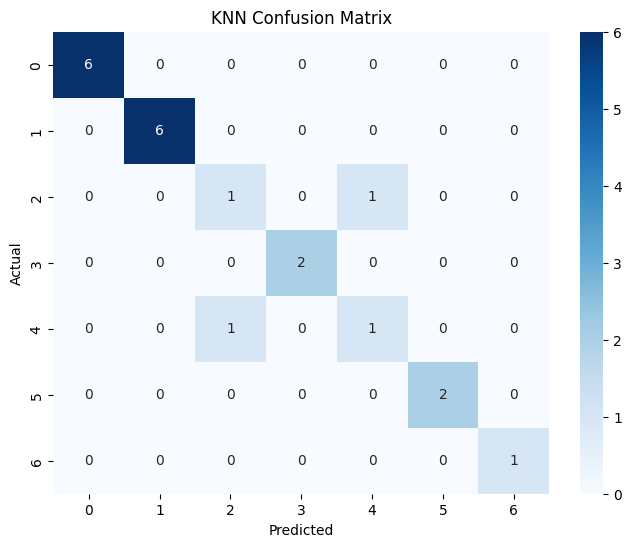

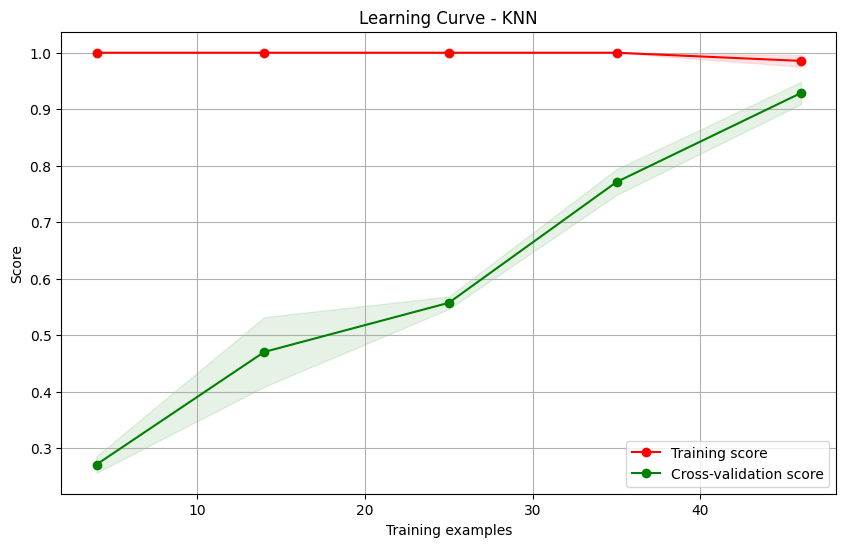

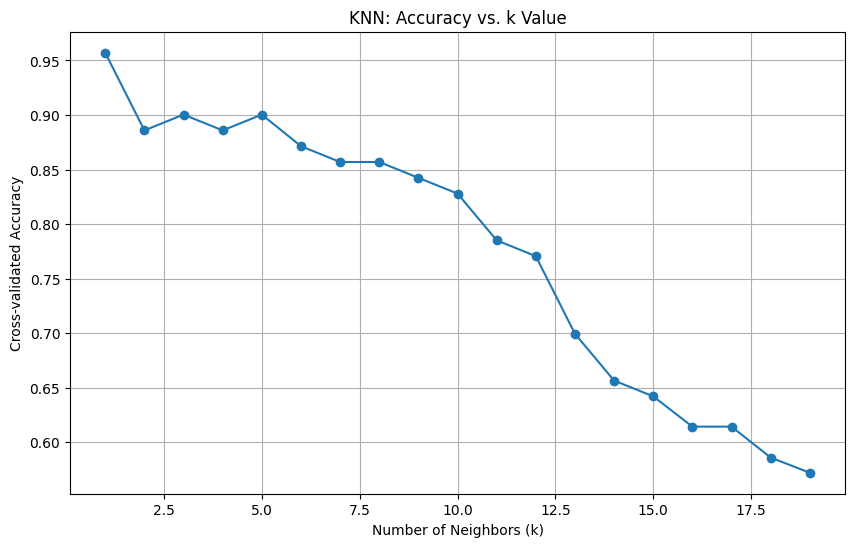

KNN model saved as 'knn_zoo_model.pkl'
Scaler saved as 'knn_scaler.pkl'


In [15]:
# K-Nearest Neighbors (KNN) Classification for Zoo Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load data
data = pd.read_csv('zoo3.csv')

# Explore the dataset
print("Dataset Overview:")
print(f"Shape: {data.shape}")
print("\nClass distribution:")
print(data['class_type'].value_counts())

# Display first few rows
data.head()

# Split features and target
X = data.drop(['animal_name', 'class_type'], axis=1)
y = data['class_type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# Define parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN
knn = KNeighborsClassifier()

# Use StratifiedKFold with fewer splits to handle small classes
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
print("Training KNN with GridSearchCV...")
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid,
                         cv=cv_strategy, n_jobs=-1, scoring='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)

# Get best model
best_knn = knn_grid_search.best_estimator_
print(f"Best parameters: {knn_grid_search.best_params_}")

# Evaluate on test set
knn_y_pred = best_knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, knn_y_pred, zero_division=0))

# Cross-validation score
knn_cv_scores = cross_val_score(best_knn, X_scaled, y, cv=cv_strategy, scoring='accuracy')
print(f"Cross-validation accuracy: {knn_cv_scores.mean():.4f} ± {knn_cv_scores.std():.4f}")

# Create confusion matrix
plt.figure(figsize=(8, 6))
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Learning curve
def plot_learning_curve(estimator, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve - KNN")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve with stratified CV
plot_learning_curve(best_knn, X_scaled, y, cv=cv_strategy)

# Visualize the effect of k value
k_range = range(1, 20)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=cv_strategy, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-validated Accuracy')
plt.title('KNN: Accuracy vs. k Value')
plt.grid(True)
plt.show()

# Save the model
import joblib
joblib.dump(best_knn, 'knn_zoo_model.pkl')
joblib.dump(scaler, 'knn_scaler.pkl')
print("KNN model saved as 'knn_zoo_model.pkl'")
print("Scaler saved as 'knn_scaler.pkl'")

## XGBoost Algorithm ##

Dataset Overview:
Shape: (70, 18)

Class distribution:
class_type
2    20
1    19
3     8
4     8
5     6
6     5
7     4
Name: count, dtype: int64
        animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0              anta     1         0     0     1         0        0         0   
1          ariranha     1         0     0     1         0        1         1   
2  boto-cor-de-rosa     0         0     0     1         0        1         1   
3             bugio     1         0     0     1         0        0         0   
4  cachorro-vinagre     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        0   
1        1         1         1         0     1     4     1         0        0   
2        1         1         1         0     1     0     1         0        0   
3        1         1         1         0     0 

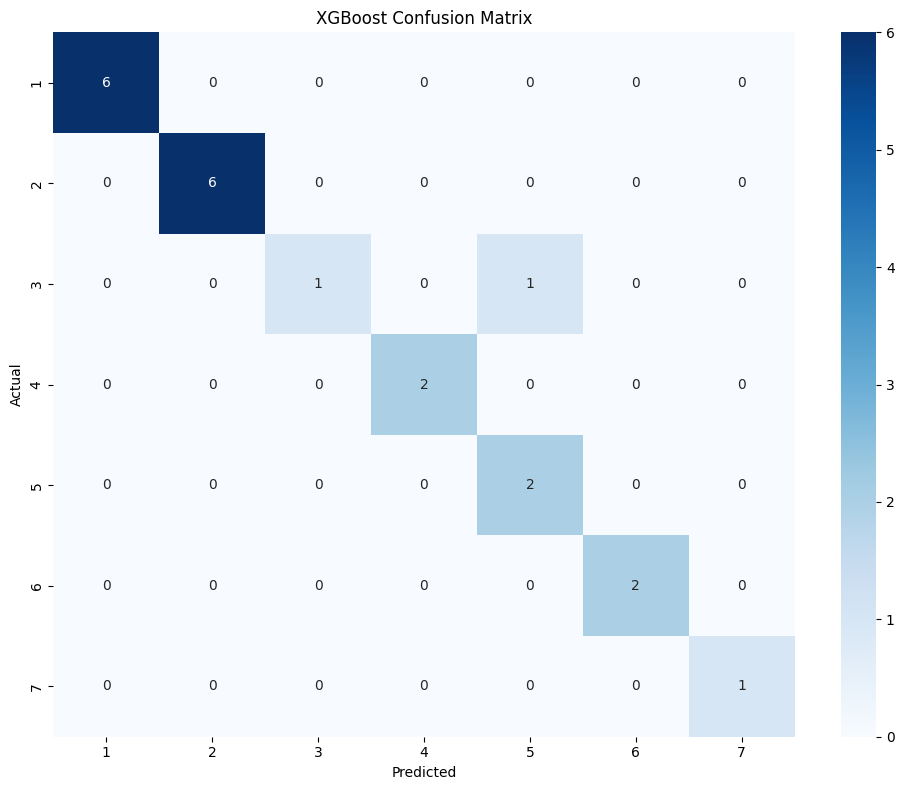

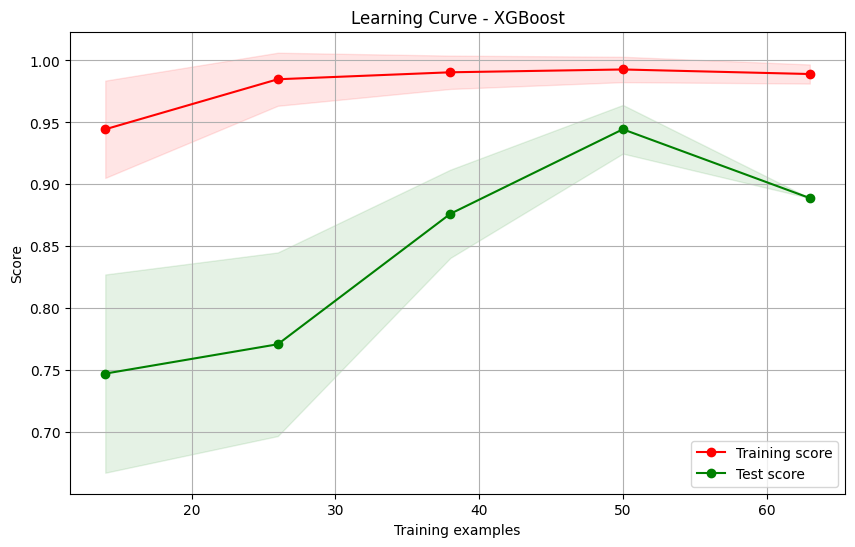

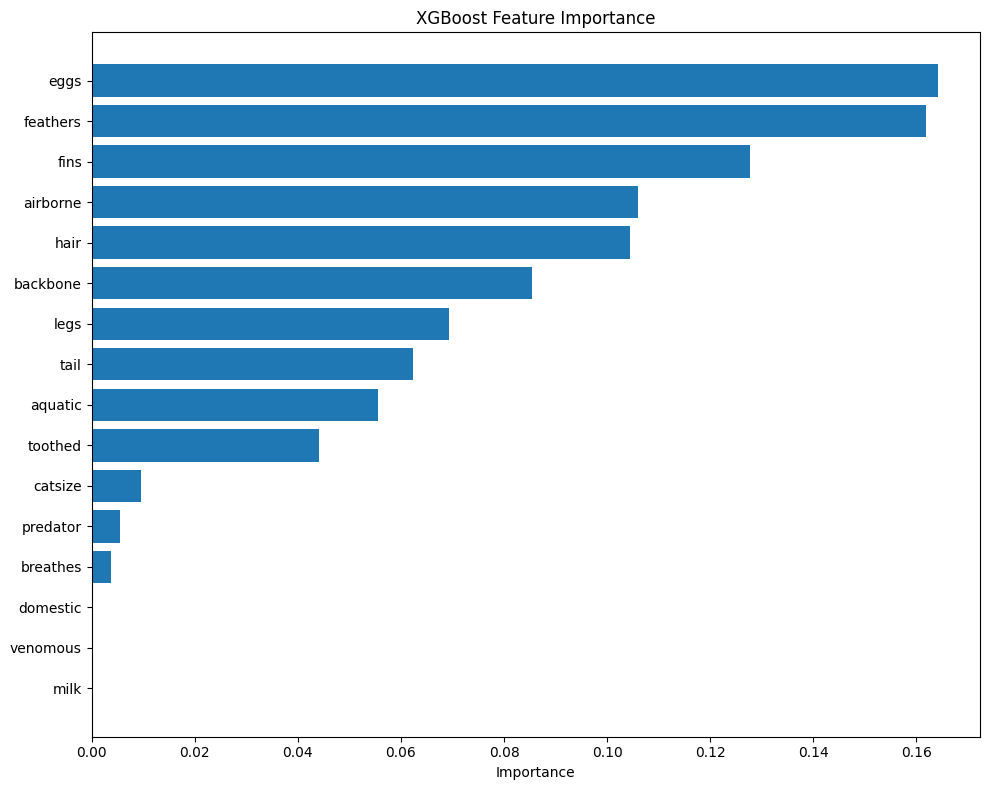

XGBoost model and class mapping saved as 'xgboost_zoo_model.pkl'

Example: Using the model to predict an animal class
Predicted class for example animal: 2


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import xgboost as xgb
import warnings
from sklearn.utils import class_weight

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load data
data = pd.read_csv('zoo3.csv')

# Explore the dataset
print("Dataset Overview:")
print(f"Shape: {data.shape}")
print("\nClass distribution:")
class_distribution = data['class_type'].value_counts()
print(class_distribution)

# Display first few rows
display = data.head()
print(display)

# Check for classes with very few samples (potential issue for cross-validation)
print("\nChecking for rare classes:")
rare_classes = class_distribution[class_distribution < 3].index.tolist()
if rare_classes:
    print(f"Warning: Classes with fewer than 3 samples: {rare_classes}")
    print("These classes may cause issues with cross-validation.")
    
    # Remove rare classes
    print(f"Removing classes with fewer than 3 samples for model stability.")
    data = data[~data['class_type'].isin(rare_classes)]
    print(f"New shape after removing rare classes: {data.shape}")
    print(f"New class distribution:\n{data['class_type'].value_counts()}")

# Split features and target
X = data.drop(['animal_name', 'class_type'], axis=1)
y = data['class_type']

# Create a mapping from original classes to zero-indexed classes
class_mapping = {original: idx for idx, original in enumerate(sorted(y.unique()))}
reverse_mapping = {idx: original for original, idx in class_mapping.items()}
print("\nClass mapping (original -> zero-indexed):")
print(class_mapping)

# Transform the target variable to start from 0
y_transformed = y.map(class_mapping)

# Split data into training and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.3, random_state=42, stratify=y_transformed)

# Check class distribution after splitting
print("\nTraining set class distribution (zero-indexed):")
print(pd.Series(y_train).value_counts())
print("\nTest set class distribution (zero-indexed):")
print(pd.Series(y_test).value_counts())

# Create class weights for balanced training
# XGBoost requires sample weights, not class weights
y_train_array = np.array(y_train)
class_weights = class_weight.compute_sample_weight(
    class_weight='balanced', y=y_train_array)

# Set number of classes
num_classes = len(np.unique(y_transformed))
print(f"Number of classes: {num_classes}")

# Create a function to check if fold split will work
def check_fold_viability(X, y, cv):
    viable = True
    for train_idx, test_idx in cv.split(X, y):
        y_train_fold = y.iloc[train_idx] if isinstance(y, pd.Series) else y[train_idx]
        y_test_fold = y.iloc[test_idx] if isinstance(y, pd.Series) else y[test_idx]
        
        if len(np.unique(y_train_fold)) < 2 or len(np.unique(y_test_fold)) < 2:
            viable = False
            break
    return viable

# Determine the appropriate number of folds
min_class_count = pd.Series(y_train).value_counts().min()
n_splits = min(min_class_count - 1, 3)  # Ensure at least one sample per class in each fold
if n_splits < 2:
    n_splits = 2  # Minimum is 2-fold CV
    
print(f"Using {n_splits}-fold cross-validation (based on smallest class size of {min_class_count})")
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define parameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Base XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob' if num_classes > 2 else 'binary:logistic',
    num_class=num_classes if num_classes > 2 else None,
    use_label_encoder=False,
    eval_metric='mlogloss' if num_classes > 2 else 'logloss',
    random_state=42
)

# Check if our CV strategy will work
if not check_fold_viability(X_train, y_train, cv):
    print("Warning: CV strategy will still result in some folds with only one class.")
    print("Switching to a simpler approach with manual validation instead of cross-validation.")
    
    # Use a simpler approach: just one train/validation split
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)
    
    # Calculate sample weights for the subsampled training set
    y_train_sub_array = np.array(y_train_sub)
    sample_weights_sub = class_weight.compute_sample_weight(
        class_weight='balanced', y=y_train_sub_array)
    
    best_score = 0
    best_params = {}
    best_model = None
    
    # Manual grid search
    print("Performing manual grid search...")
    for max_depth in xgb_param_grid['max_depth']:
        for learning_rate in xgb_param_grid['learning_rate']:
            for n_estimators in xgb_param_grid['n_estimators']:
                for subsample in xgb_param_grid['subsample']:
                    for colsample_bytree in xgb_param_grid['colsample_bytree']:
                        try:
                            model = xgb.XGBClassifier(
                                max_depth=max_depth,
                                learning_rate=learning_rate,
                                n_estimators=n_estimators,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree,
                                objective='multi:softprob' if num_classes > 2 else 'binary:logistic',
                                num_class=num_classes if num_classes > 2 else None,
                                use_label_encoder=False,
                                eval_metric='mlogloss' if num_classes > 2 else 'logloss',
                                random_state=42
                            )
                            model.fit(X_train_sub, y_train_sub, sample_weight=sample_weights_sub)
                            score = accuracy_score(y_val, model.predict(X_val))
                            
                            if score > best_score:
                                best_score = score
                                best_params = {
                                    'max_depth': max_depth,
                                    'learning_rate': learning_rate,
                                    'n_estimators': n_estimators,
                                    'subsample': subsample,
                                    'colsample_bytree': colsample_bytree
                                }
                                best_model = model
                        except Exception as e:
                            print(f"Error with parameters max_depth={max_depth}, lr={learning_rate}, etc.: {e}")
    
    print(f"Best parameters from manual search: {best_params}")
    print(f"Best validation accuracy: {best_score:.4f}")
    
    # Retrain on full training data with best parameters
    best_xgb = xgb.XGBClassifier(
        max_depth=best_params['max_depth'],
        learning_rate=best_params['learning_rate'],
        n_estimators=best_params['n_estimators'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        objective='multi:softprob' if num_classes > 2 else 'binary:logistic',
        num_class=num_classes if num_classes > 2 else None,
        use_label_encoder=False,
        eval_metric='mlogloss' if num_classes > 2 else 'logloss',
        random_state=42
    )
    best_xgb.fit(X_train, y_train, sample_weight=class_weights)
    
else:
    # If CV strategy works, use GridSearchCV as planned
    print("Training XGBoost with GridSearchCV...")
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        xgb_grid_search = GridSearchCV(
            estimator=xgb_model, 
            param_grid=xgb_param_grid,
            cv=cv, 
            n_jobs=-1, 
            scoring='accuracy', 
            error_score=np.nan
        )
        xgb_grid_search.fit(X_train, y_train, sample_weight=class_weights)
    
    # Get best model
    best_xgb = xgb_grid_search.best_estimator_
    print(f"Best parameters: {xgb_grid_search.best_params_}")

# Evaluate on test set
xgb_y_pred = best_xgb.predict(X_test)

# Map predictions and test labels back to original classes for reporting
y_test_original = y_test.map(reverse_mapping) if isinstance(y_test, pd.Series) else np.array([reverse_mapping[y] for y in y_test])
xgb_y_pred_original = np.array([reverse_mapping[pred] for pred in xgb_y_pred])

xgb_accuracy = accuracy_score(y_test_original, xgb_y_pred_original)
print(f"XGBoost Test Set Accuracy: {xgb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_original, xgb_y_pred_original))

# Cross-validation - skip if we're using manual validation
if 'xgb_grid_search' in locals():
    try:
        # Try cross-validation with careful handling of potential errors
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            xgb_cv_scores = cross_val_score(best_xgb, X, y_transformed, cv=cv, scoring='accuracy')
        print(f"Cross-validation accuracy: {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")
    except Exception as e:
        print(f"Cross-validation failed with error: {e}")
        print("Skipping cross-validation metrics.")

# Create confusion matrix
plt.figure(figsize=(10, 8))
xgb_cm = confusion_matrix(y_test_original, xgb_y_pred_original)
unique_classes = sorted(np.unique(np.concatenate([y_test_original, xgb_y_pred_original])))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_classes, 
            yticklabels=unique_classes)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('xgboost_confusion_matrix.png')
plt.show()

# Define a custom learning curve function for XGBoost
def plot_learning_curve(estimator, X, y, class_mapping):
    """
    Plot learning curve optimized for multi-class datasets with small sample sizes.
    Uses manual train/test splits that maintain class representation.
    
    Args:
        estimator: Trained model
        X: Feature matrix
        y: Target variable (original classes, not zero-indexed)
        class_mapping: Dictionary mapping original classes to zero-indexed classes
    """
    # Transform y to zero-indexed if it's not already
    if isinstance(y, pd.Series):
        y_transformed = y.map(class_mapping)
    else:
        y_transformed = np.array([class_mapping.get(val, val) for val in y])
    
    # Count classes and samples
    n_classes = len(np.unique(y_transformed))
    n_samples = X.shape[0]
    
    # Create train sizes ensuring all classes are represented
    # Start with a minimum size that can include all classes
    min_train_size = max(n_classes * 2, int(0.1 * n_samples))
    max_train_size = int(0.9 * n_samples)  # Leave some for testing
    
    # Check if we have enough data to create a meaningful curve
    if min_train_size >= max_train_size:
        print(f"Not enough data to create a learning curve. Need more than {min_train_size} samples.")
        return
    
    # Define train sizes
    train_sizes_abs = np.linspace(min_train_size, max_train_size, 5, dtype=int)
    train_scores, test_scores = [], []
    
    # For each absolute training size
    for train_size in train_sizes_abs:
        this_train_scores, this_test_scores = [], []
        
        # Run multiple splits to reduce variance
        for i in range(3):
            try:
                # Create stratified indices for this split
                indices = np.arange(n_samples)
                np.random.seed(i)
                np.random.shuffle(indices)
                
                # Use stratified sampling to ensure class representation
                train_idx = []
                test_idx = []
                                         
                # Get indices for each class
                for cls in np.unique(y_transformed):
                    cls_indices = indices[np.array(y_transformed)[indices] == cls]
                    # Determine count for this class (proportional to its size)
                    cls_count = min(len(cls_indices), max(1, int(train_size * len(cls_indices) / n_samples)))
                    # Add to train and test sets
                    train_idx.extend(cls_indices[:cls_count])
                    test_idx.extend(cls_indices[cls_count:])
                
                # Convert to arrays
                train_idx = np.array(train_idx)
                test_idx = np.array(test_idx)
                
                # Check if we have enough samples for each class in both sets
                if len(np.unique(np.array(y_transformed)[train_idx])) < n_classes or len(np.unique(np.array(y_transformed)[test_idx])) < n_classes:
                    continue
                
                # Extract train and test sets
                X_train_lc = X[train_idx]
                y_train_lc = np.array(y_transformed)[train_idx]
                X_test_lc = X[test_idx]
                y_test_lc = np.array(y_transformed)[test_idx]
                
                # Compute balanced sample weights for training set
                sample_weights_lc = class_weight.compute_sample_weight(
                    class_weight='balanced', y=y_train_lc)
                
                # Extract parameters from the best model
                params = {
                    'max_depth': getattr(estimator, 'max_depth', 3),
                    'learning_rate': getattr(estimator, 'learning_rate', 0.1),
                    'n_estimators': getattr(estimator, 'n_estimators', 100),
                    'subsample': getattr(estimator, 'subsample', 0.8),
                    'colsample_bytree': getattr(estimator, 'colsample_bytree', 0.8)
                }
                
                # Train and score model
                model_clone = xgb.XGBClassifier(
                    max_depth=params['max_depth'],
                    learning_rate=params['learning_rate'],
                    n_estimators=params['n_estimators'],
                    subsample=params['subsample'],
                    colsample_bytree=params['colsample_bytree'],
                    objective='multi:softprob' if n_classes > 2 else 'binary:logistic',
                    num_class=n_classes if n_classes > 2 else None,
                    use_label_encoder=False,
                    eval_metric='mlogloss' if n_classes > 2 else 'logloss',
                    random_state=42
                )
                model_clone.fit(X_train_lc, y_train_lc, sample_weight=sample_weights_lc)
                
                # Calculate scores
                train_score = accuracy_score(y_train_lc, model_clone.predict(X_train_lc))
                test_score = accuracy_score(y_test_lc, model_clone.predict(X_test_lc))
                
                this_train_scores.append(train_score)
                this_test_scores.append(test_score)
                
            except Exception as e:
                print(f"Warning: Failed iteration with size {train_size}: {e}")
                continue
        
        # Only keep results if successful
        if this_train_scores and this_test_scores:
            train_scores.append(this_train_scores)
            test_scores.append(this_test_scores)
        else:
            print(f"No valid results for training size {train_size}")
    
    # Check if we have enough data points to plot
    if len(train_scores) < 2:
        print("Not enough valid points to plot a learning curve.")
        return
    
    # Convert to numpy arrays
    train_scores = np.array(train_scores)
    test_scores = np.array(test_scores)
    
    # Calculate means and standard deviations
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve - XGBoost")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    # Get valid train sizes (those with scores)
    valid_train_sizes = train_sizes_abs[:len(train_scores)]
    
    plt.fill_between(valid_train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(valid_train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(valid_train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(valid_train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
    plt.legend(loc="best")
    plt.savefig('xgboost_learning_curve.png')
    plt.show()

# Plot learning curve with custom implementation to avoid CV issues
try:
    # Convert data to numpy arrays for the learning curve function
    X_np = X.values
    y_np = y.values if isinstance(y, pd.Series) else y
    
    plot_learning_curve(best_xgb, X_np, y_np, class_mapping)
except Exception as e:
    print(f"Error creating learning curve: {e}")
    print("Skipping learning curve visualization.")

# Feature importance visualization
plt.figure(figsize=(10, 8))
feature_importance = best_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png')
plt.show()

# Save the model and class mappings
model_data = {
    'model': best_xgb, 
    'class_mapping': class_mapping,
    'reverse_mapping': reverse_mapping
}
joblib.dump(model_data, 'xgboost_zoo_model.pkl')
print("XGBoost model and class mapping saved as 'xgboost_zoo_model.pkl'")

# Create a prediction function for new data
def predict_animal_class(features, model_data=None):
    """
    Predict the class of an animal based on its features.
    
    Args:
        features (dict): Dictionary with feature names as keys
        model_data: Dictionary containing model and class mappings
        
    Returns:
        int: Predicted class (in original class numbering)
    """
    if model_data is None:
        model_data = joblib.load('xgboost_zoo_model.pkl')
    
    model = model_data['model']
    reverse_mapping = model_data['reverse_mapping']
    
    # Convert features to DataFrame with correct column order
    feature_df = pd.DataFrame([features], columns=X.columns)
    
    # Make prediction (zero-indexed)
    prediction = model.predict(feature_df)[0]
    
    # Convert back to original class numbering
    original_class = reverse_mapping[prediction]
    
    return original_class

# Example usage of prediction function
print("\nExample: Using the model to predict an animal class")
# Let's create an example based on feature columns in X
example_features = {col: 1 for col in X.columns}  # Example with all 1s
model_data = {'model': best_xgb, 'reverse_mapping': reverse_mapping}
predicted_class = predict_animal_class(example_features, model_data)
print(f"Predicted class for example animal: {predicted_class}")

## Compararea Modelelor/Algoritmilor ##

Class distribution:
class_type
2    20
1    19
3     8
4     8
5     6
6     5
7     4
Name: count, dtype: int64

Class distribution in training set:
class_type
2    14
1    13
4     6
3     6
5     4
7     3
6     3
Name: count, dtype: int64

Using StratifiedKFold with 3 splits (based on smallest class size).

Cross-validation comparison:
Processing Random Forest model of type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Random Forest CV Accuracy: 0.9432 ± 0.0188
Processing SVM model of type: <class 'sklearn.svm._classes.SVC'>
SVM CV Accuracy: 0.9432 ± 0.0188
Processing KNN model of type: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
KNN CV Accuracy: 0.9577 ± 0.0340
Processing XGBoost model of type: <class 'xgboost.sklearn.XGBClassifier'>
XGBoost CV Accuracy: 0.9281 ± 0.0414


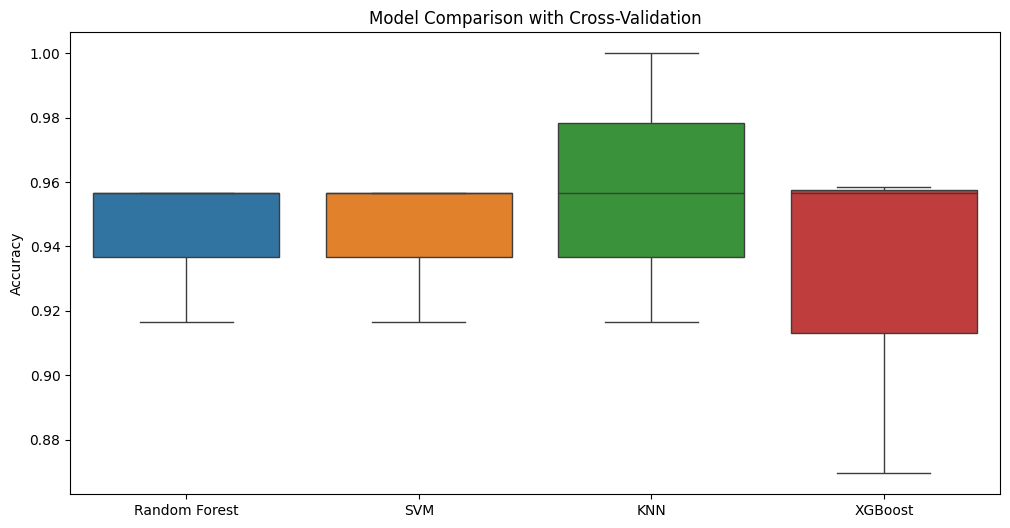

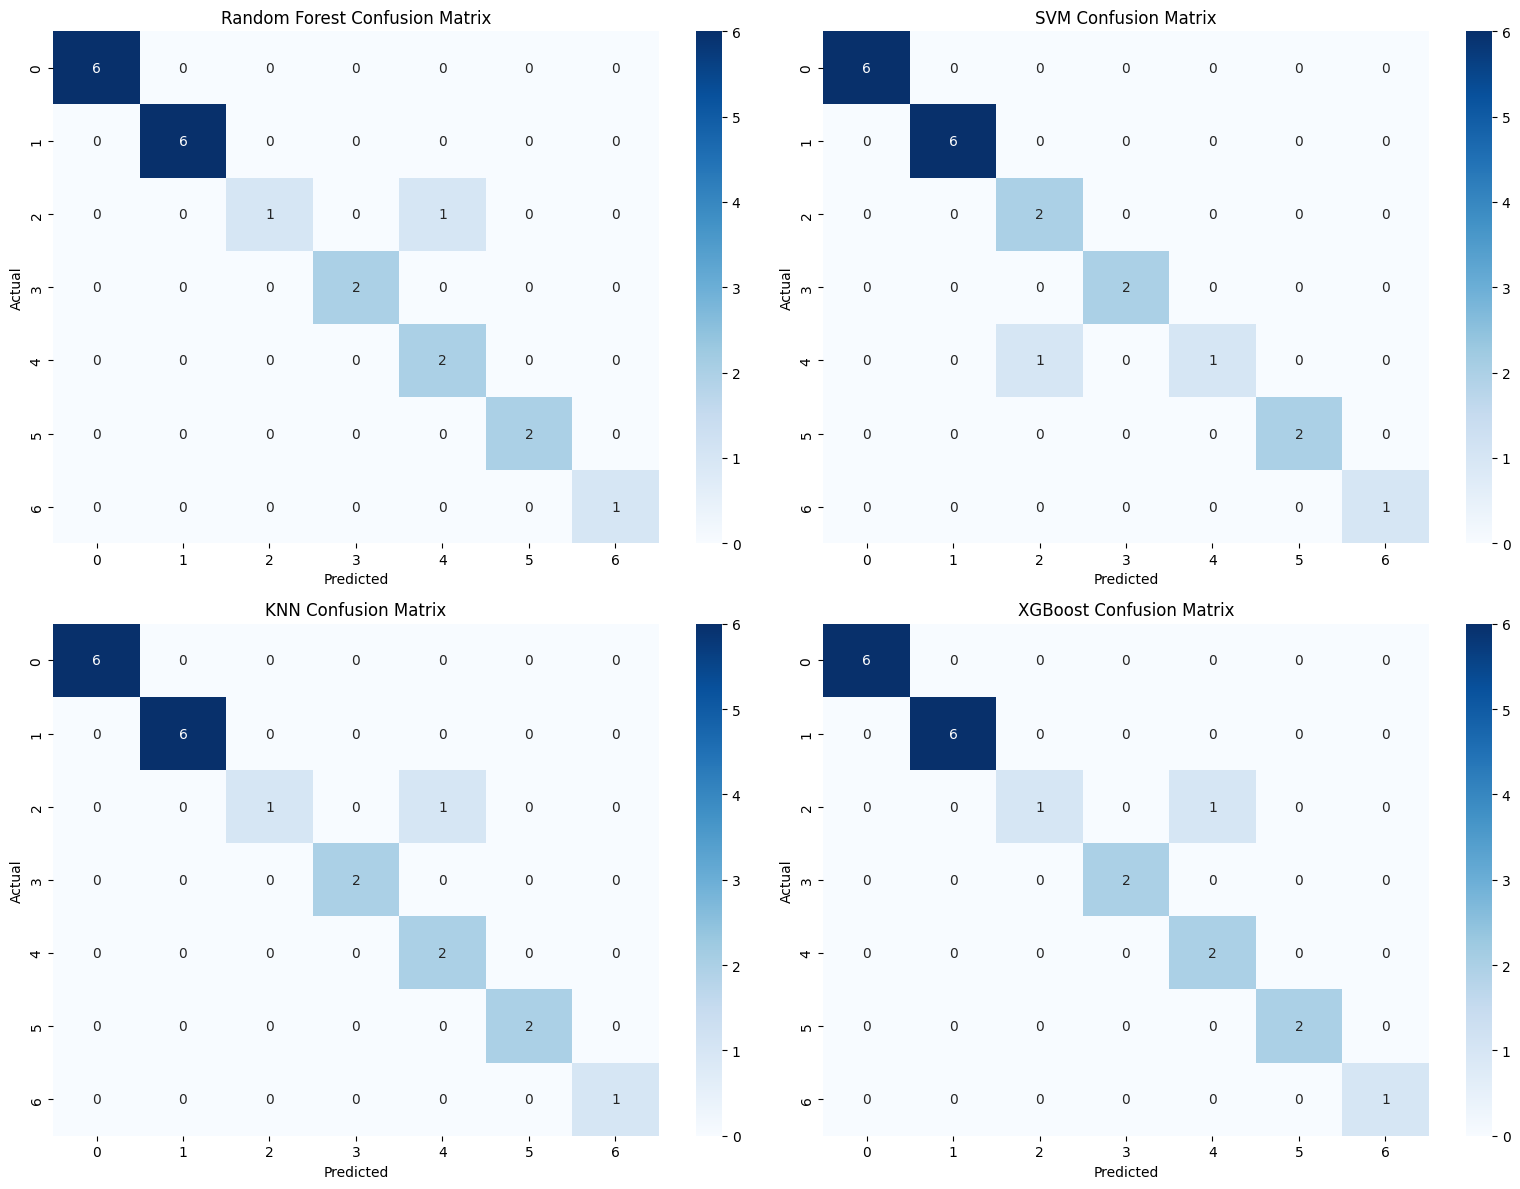

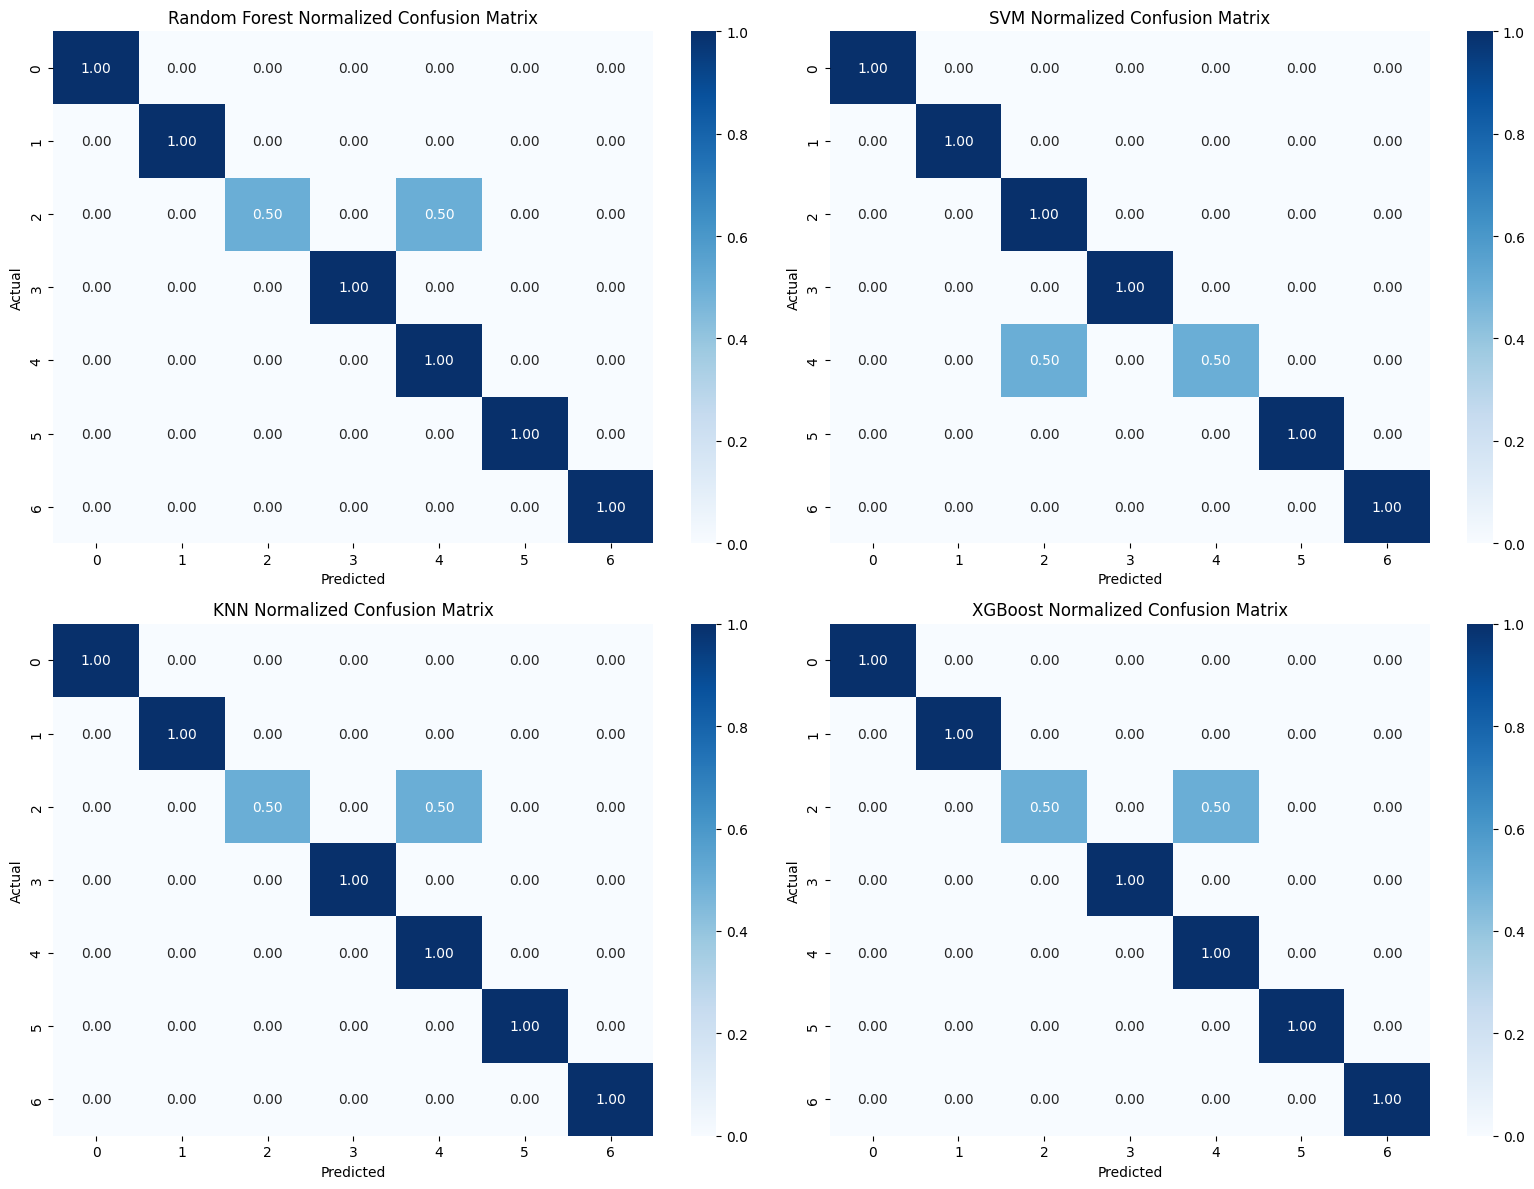


Comprehensive model evaluation:

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.95      0.93      0.92        21
weighted avg       0.97      0.95      0.95        21


SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50

<Figure size 1400x600 with 0 Axes>

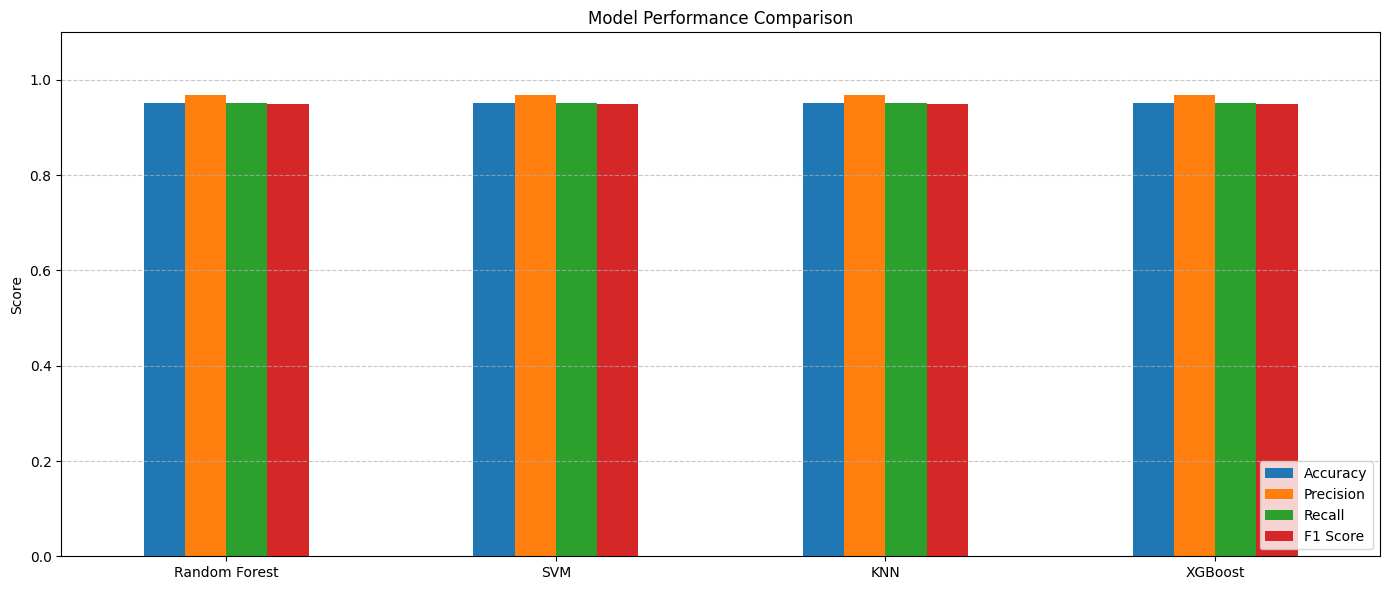

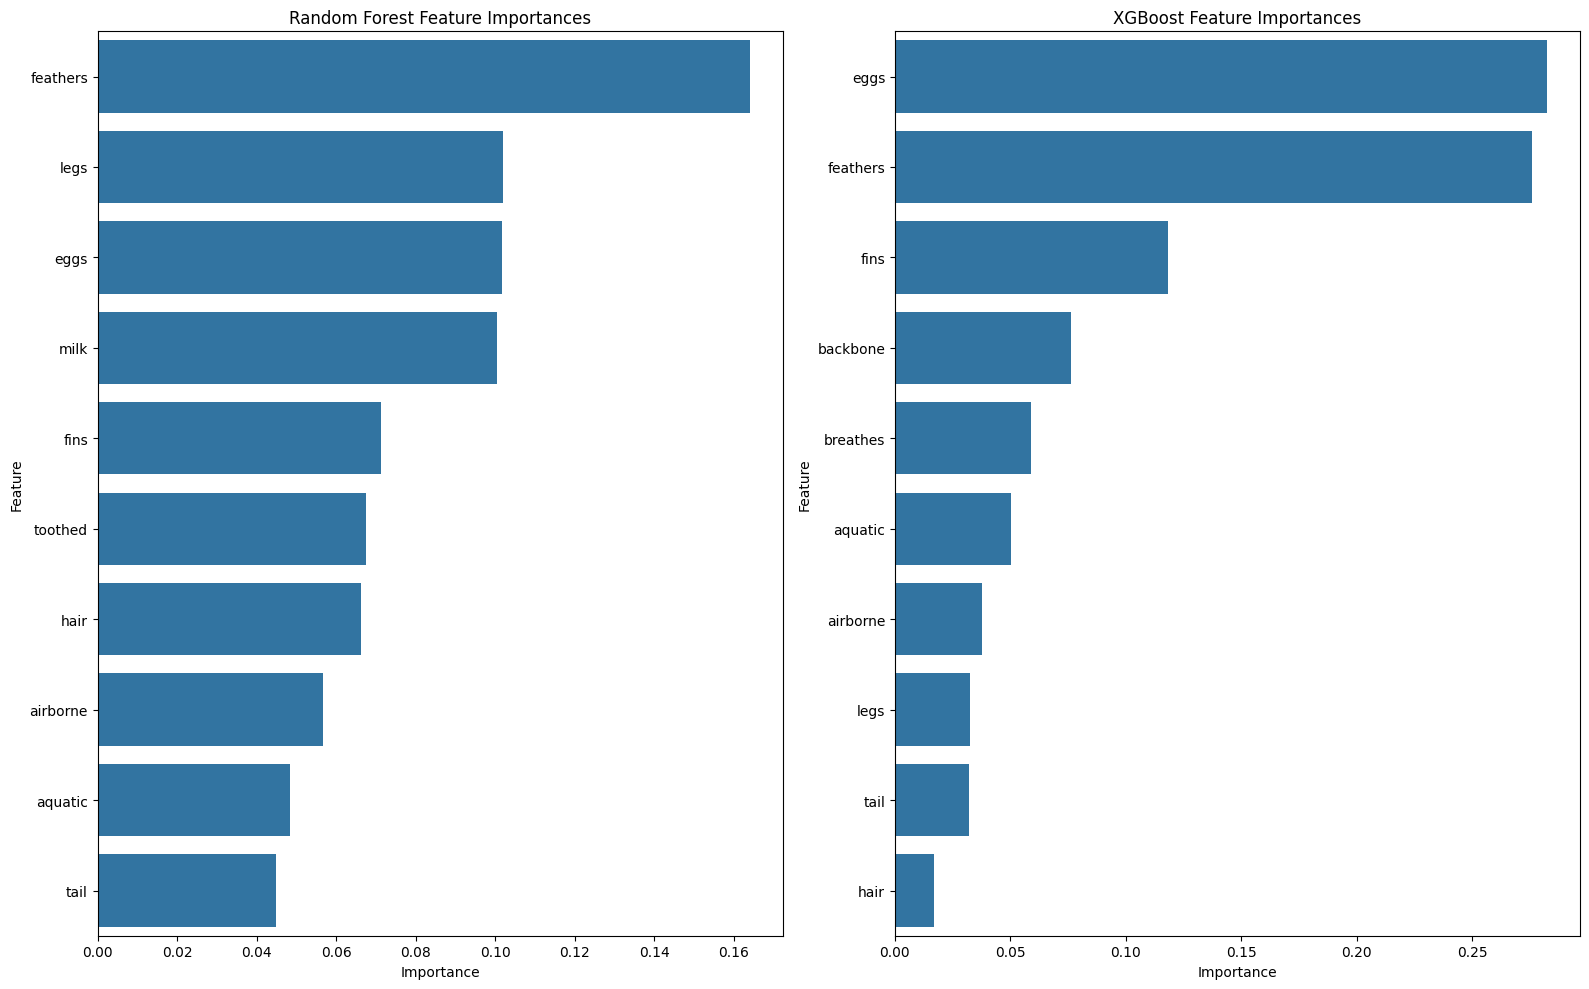


Top 5 Most Important Features (Random Forest):
     Feature  Importance
1   feathers    0.164077
12      legs    0.101866
2       eggs    0.101715
3       milk    0.100312
11      fins    0.071197

Top 5 Most Important Features (XGBoost):
     Feature  Importance
2       eggs    0.282541
1   feathers    0.275855
11      fins    0.118329
8   backbone    0.076231
9   breathes    0.058923

F1 Score per Class:
   Random Forest       SVM       KNN   XGBoost
1       1.000000  1.000000  1.000000  1.000000
2       1.000000  1.000000  1.000000  1.000000
3       0.666667  0.800000  0.666667  0.666667
4       1.000000  1.000000  1.000000  1.000000
5       0.800000  0.666667  0.800000  0.800000
6       1.000000  1.000000  1.000000  1.000000
7       1.000000  1.000000  1.000000  1.000000


<Figure size 1400x600 with 0 Axes>

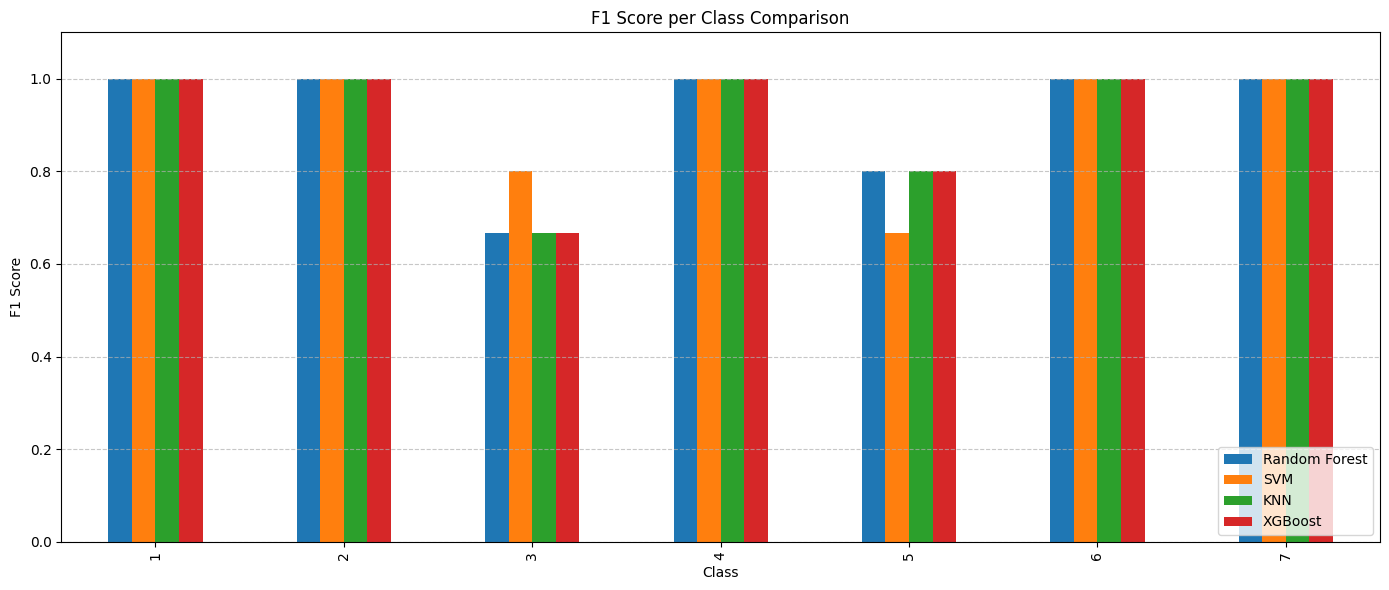


Model Selection Analysis:
               Accuracy  Precision    Recall  F1 Score  Weighted Score
Random Forest  0.952381   0.968254  0.952381  0.949206        0.953492
SVM            0.952381   0.968254  0.952381  0.949206        0.953492
KNN            0.952381   0.968254  0.952381  0.949206        0.953492
XGBoost        0.952381   0.968254  0.952381  0.949206        0.953492

Best model based on weighted criteria: SVM
Weighted score: 0.9535

Final Model Recommendation:
Based on comprehensive evaluation, the SVM model is recommended for this classification task.
Key metrics: {'Accuracy': 0.9523809523809523, 'Precision': 0.9682539682539684, 'Recall': 0.9523809523809523, 'F1 Score': 0.9492063492063492, 'Weighted Score': 0.9534920634920636}

Final model saved as 'final_zoo_model.pkl'
Scaler saved as 'final_zoo_scaler.pkl'
XGBoost model saved as 'xgboost_zoo_model.pkl'

Dataset Analysis and Limitations:
- Total samples: 70
- Number of classes: 7
- Smallest class size: 4 samples (class 7

In [17]:
# Model Comparison for Zoo Classification Dataset - Including XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix, 
                            precision_score, recall_score, f1_score)
import joblib
import warnings
from sklearn.exceptions import ConvergenceWarning
# Import XGBoost
import xgboost as xgb

# Filter some warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Set random seed for reproducibility
np.random.seed(42)

# Load data
data = pd.read_csv('zoo3.csv')

# Explore class distribution
print("Class distribution:")
class_counts = data['class_type'].value_counts()
print(class_counts)

# Check for classes with very few samples
min_samples_per_class = 3
small_classes = class_counts[class_counts < min_samples_per_class]
if not small_classes.empty:
    print(f"\nWarning: Some classes have fewer than {min_samples_per_class} samples:")
    print(small_classes)
    print("Consider merging these classes or collecting more data.")

# Split features and target
X = data.drop(['animal_name', 'class_type'], axis=1)
y = data['class_type']

# Create a label encoder to transform class labels from 1-7 to 0-6 for XGBoost
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Also create encoded versions for XGBoost
_, _, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# Check if each class has enough samples in the training set
train_class_counts = pd.Series(y_train).value_counts()
print("\nClass distribution in training set:")
print(train_class_counts)

# Define a safe cross-validation strategy based on the smallest class size
min_class_count = train_class_counts.min()
n_splits = min(3, min_class_count)  # Ensure we don't have more splits than samples in smallest class
if n_splits < 2:
    print("\nWARNING: Smallest class has only 1 sample. Using LOO (Leave-One-Out) CV instead.")
    from sklearn.model_selection import LeaveOneOut
    cv_strategy = LeaveOneOut()
else:
    print(f"\nUsing StratifiedKFold with {n_splits} splits (based on smallest class size).")
    cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create new models
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
best_rf = rf

# SVM with safe parameters
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42, probability=True, decision_function_shape='ovr')
svm.fit(X_train_scaled, y_train)
best_svm = svm

# KNN
knn = KNeighborsClassifier(n_neighbors=min(3, min_class_count), weights='distance', metric='manhattan')
knn.fit(X_train_scaled, y_train)
best_knn = knn

# XGBoost
# Set number of classes
num_classes = len(np.unique(y_encoded))  # Use encoded classes
objective = 'multi:softmax' if num_classes > 2 else 'binary:logistic'

xgboost = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    objective=objective,
    num_class=num_classes if num_classes > 2 else None,
    eval_metric='mlogloss' if num_classes > 2 else 'logloss',
    random_state=42
)
# Use encoded labels for XGBoost
xgboost.fit(X_train, y_train_encoded)
best_xgb = xgboost

# Models to compare
models = {
    'Random Forest': best_rf,
    'SVM': best_svm,
    'KNN': best_knn,
    'XGBoost': best_xgb
}

# Safe cross-validation function
def safe_cv_score(model, X, y, cv, scoring='accuracy', is_xgboost=False):
    """Performs cross-validation safely, handling cases where a fold has only one class."""
    # Check if the model is a dictionary with a 'model' key
    if isinstance(model, dict) and 'model' in model:
        print(f"Extracting model from dictionary: {type(model['model'])}")
        actual_model = model['model']
    else:
        actual_model = model
    
    # For XGBoost, use encoded labels
    if is_xgboost:
        y_for_cv = label_encoder.transform(y)
    else:
        y_for_cv = y
    
    try:
        scores = cross_val_score(actual_model, X, y_for_cv, cv=cv, scoring=scoring)
        return scores
    except ValueError as e:
        if "classes" in str(e).lower():
            print(f"Warning: Cross-validation failed with error: {e}")
            print("Adjusting CV strategy...")
            
            # Fallback to a simpler CV strategy
            if isinstance(cv, StratifiedKFold):
                if cv.n_splits > 2:
                    new_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
                    print(f"Trying with {new_cv.n_splits} splits instead...")
                    return safe_cv_score(actual_model, X, y_for_cv, new_cv, scoring, is_xgboost)
                else:
                    # If we already tried with 2 splits, use a different strategy
                    from sklearn.model_selection import KFold
                    print("Using standard KFold instead of StratifiedKFold...")
                    new_cv = KFold(n_splits=2, shuffle=True, random_state=42)
                    return safe_cv_score(actual_model, X, y_for_cv, new_cv, scoring, is_xgboost)
            else:
                # Last resort - use a simple train/test split
                print("Using a single train/test split for validation...")
                X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
                    X, y_for_cv, test_size=0.3, random_state=42)
                actual_model.fit(X_train_cv, y_train_cv)
                score = actual_model.score(X_test_cv, y_test_cv)
                return np.array([score])
        else:
            # If it's a different error, re-raise it
            raise
    except Exception as e:
        print(f"Unexpected error in cross_val_score: {str(e)}")
        print(f"Model type: {type(actual_model)}")
        # As a last resort, return a single train/test split score
        X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
            X, y_for_cv, test_size=0.3, random_state=42)
        actual_model.fit(X_train_cv, y_train_cv)
        score = actual_model.score(X_test_cv, y_test_cv)
        return np.array([score])

# Cross-validation comparison
print("\nCross-validation comparison:")
cv_results = {}
for name, model in models.items():
    # Use scaled data for SVM and KNN, unscaled for tree-based models
    X_eval = X_scaled if name in ['SVM', 'KNN'] else X
    # Debug information
    print(f"Processing {name} model of type: {type(model)}")
    try:
        # XGBoost needs special handling for encoded labels
        is_xgboost = name == 'XGBoost'
        scores = safe_cv_score(model, X_eval, y, cv=cv_strategy, scoring='accuracy', is_xgboost=is_xgboost)
        cv_results[name] = scores
        print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    except Exception as e:
        print(f"Error during CV for {name}: {str(e)}")
        # Fallback: use a simple train/test split
        X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
            X_eval, y, test_size=0.3, random_state=42)
        
        if isinstance(model, dict) and 'model' in model:
            actual_model = model['model']
        else:
            actual_model = model
            
        if name == 'XGBoost':
            y_train_cv_encoded = label_encoder.transform(y_train_cv)
            y_test_cv_encoded = label_encoder.transform(y_test_cv)
            actual_model.fit(X_train_cv, y_train_cv_encoded)
            y_pred = actual_model.predict(X_test_cv)
            score = accuracy_score(y_test_cv_encoded, y_pred)
        else:
            actual_model.fit(X_train_cv, y_train_cv)
            score = actual_model.score(X_test_cv, y_test_cv)
        
        cv_results[name] = np.array([score])
        print(f"{name} Train/Test Split Accuracy: {score:.4f}")

# Visualize cross-validation comparison if we have valid scores
has_valid_scores = all(len(scores) > 0 for scores in cv_results.values())
if has_valid_scores:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=[cv_results[model] for model in models.keys()])
    plt.xticks(range(len(models)), models.keys())
    plt.ylabel('Accuracy')
    plt.title('Model Comparison with Cross-Validation')
    plt.show()

# Function to safely get predictions
def safe_predict(model, X, is_xgboost=False):
    """Safely get predictions from a model, handling the case where model is a dictionary"""
    if isinstance(model, dict) and 'model' in model:
        actual_model = model['model']
    else:
        actual_model = model
        
    if is_xgboost:
        # For XGBoost, transform predictions back to original labels
        preds_encoded = actual_model.predict(X)
        return label_encoder.inverse_transform(preds_encoded.astype(int))
    else:
        return actual_model.predict(X)

# Get predictions
rf_pred = safe_predict(best_rf, X_test)
svm_pred = safe_predict(best_svm, X_test_scaled)
knn_pred = safe_predict(best_knn, X_test_scaled)
xgb_pred = safe_predict(best_xgb, X_test, is_xgboost=True)  # Transform XGBoost predictions

# Confusion matrices with absolute values
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
preds = [rf_pred, svm_pred, knn_pred, xgb_pred]
titles = ['Random Forest', 'SVM', 'KNN', 'XGBoost']

for i, (pred, title) in enumerate(zip(preds, titles)):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{title} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Calculate normalized confusion matrices (percentage) only if classes > 1
if len(np.unique(y_test)) > 1:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    for i, (pred, title) in enumerate(zip(preds, titles)):
        cm = confusion_matrix(y_test, pred)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # Replace NaN with 0
        cm_normalized = np.nan_to_num(cm_normalized)
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{title} Normalized Confusion Matrix')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Calculate comprehensive metrics
print("\nComprehensive model evaluation:")
model_metrics = {}
for name, preds in zip(['Random Forest', 'SVM', 'KNN', 'XGBoost'], [rf_pred, svm_pred, knn_pred, xgb_pred]):
    accuracy = accuracy_score(y_test, preds)
    
    # Handle the case where some classes might not be in the test set
    try:
        precision = precision_score(y_test, preds, average='weighted', zero_division=0)
        recall = recall_score(y_test, preds, average='weighted', zero_division=0)
        f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    except:
        print(f"Warning: Error calculating metrics for {name}. Setting to 0.")
        precision = recall = f1 = 0
    
    model_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    print(f"\n{name} Classification Report:")
    try:
        print(classification_report(y_test, preds, zero_division=0))
    except:
        print("Error generating classification report")

# Create a dataframe for easier comparison
metrics_df = pd.DataFrame(model_metrics).T
print("\nMetrics Summary:")
print(metrics_df)

# Visualize metrics comparison
plt.figure(figsize=(14, 6))
metrics_df.plot(kind='bar', figsize=(14, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Safely get feature importances
def safe_get_feature_importances(model):
    """Safely get feature importances from a model, handling the case where model is a dictionary"""
    if isinstance(model, dict) and 'model' in model:
        actual_model = model['model']
    else:
        actual_model = model
    
    if hasattr(actual_model, 'feature_importances_'):
        return actual_model.feature_importances_
    return None

# Feature importance for tree-based models
plt.figure(figsize=(16, 10))

# Random Forest feature importance
plt.subplot(1, 2, 1)
rf_importances = safe_get_feature_importances(best_rf)
if rf_importances is not None:
    rf_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_importances
    }).sort_values(by='Importance', ascending=False)
    
    sns.barplot(x='Importance', y='Feature', data=rf_importances_df.head(10))
    plt.title('Random Forest Feature Importances')
    plt.tight_layout()

# XGBoost feature importance
plt.subplot(1, 2, 2)
xgb_importances = safe_get_feature_importances(best_xgb)
if xgb_importances is not None:
    xgb_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': xgb_importances
    }).sort_values(by='Importance', ascending=False)
    
    sns.barplot(x='Importance', y='Feature', data=xgb_importances_df.head(10))
    plt.title('XGBoost Feature Importances')

plt.tight_layout()
plt.show()

# Print top features
print("\nTop 5 Most Important Features (Random Forest):")
if rf_importances is not None:
    print(rf_importances_df.head(5))

print("\nTop 5 Most Important Features (XGBoost):")
if xgb_importances is not None:
    print(xgb_importances_df.head(5))

# Try to perform per-class analysis if possible
try:
    # Per-class performance analysis
    class_metrics = {}
    for name, preds in zip(['Random Forest', 'SVM', 'KNN', 'XGBoost'], [rf_pred, svm_pred, knn_pred, xgb_pred]):
        try:
            class_report = classification_report(y_test, preds, output_dict=True, zero_division=0)
            for class_id, metrics in class_report.items():
                if class_id.isdigit() or (isinstance(class_id, (int, np.integer))):
                    if class_id not in class_metrics:
                        class_metrics[class_id] = {}
                    class_metrics[class_id][name] = metrics['f1-score']
        except Exception as e:
            print(f"Warning: Error in per-class analysis for {name}: {e}")

    # Plot per-class F1 scores if we have valid data
    if class_metrics:
        class_metrics_df = pd.DataFrame(class_metrics).T
        class_metrics_df.index = class_metrics_df.index.astype(str)  # Ensure index is string
        print("\nF1 Score per Class:")
        print(class_metrics_df)

        plt.figure(figsize=(14, 6))
        class_metrics_df.plot(kind='bar', figsize=(14, 6))
        plt.title('F1 Score per Class Comparison')
        plt.ylabel('F1 Score')
        plt.xlabel('Class')
        plt.ylim(0, 1.1)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"Skipping per-class analysis due to error: {e}")

# Select best model based on weighted criteria
# We'll give more weight to F1 Score, slightly less to Accuracy
print("\nModel Selection Analysis:")
weighted_score = 0.4 * metrics_df['F1 Score'] + 0.3 * metrics_df['Accuracy'] + 0.15 * metrics_df['Precision'] + 0.15 * metrics_df['Recall']
metrics_df['Weighted Score'] = weighted_score
print(metrics_df)

best_model_name = metrics_df['Weighted Score'].idxmax()
print(f"\nBest model based on weighted criteria: {best_model_name}")
print(f"Weighted score: {metrics_df.loc[best_model_name, 'Weighted Score']:.4f}")

# Final recommendation
print("\nFinal Model Recommendation:")
print(f"Based on comprehensive evaluation, the {best_model_name} model is recommended for this classification task.")
print(f"Key metrics: {metrics_df.loc[best_model_name].to_dict()}")

# Get the final model, handling both regular model and dictionary case
if isinstance(models[best_model_name], dict) and 'model' in models[best_model_name]:
    final_model = models[best_model_name]['model']
else:
    final_model = models[best_model_name]

# Save the final selected model
joblib.dump(final_model, 'final_zoo_model.pkl')
print("\nFinal model saved as 'final_zoo_model.pkl'")

# If the final model is XGBoost, also save the label encoder
if best_model_name == 'XGBoost':
    joblib.dump(label_encoder, 'label_encoder.pkl')
    print("Label encoder saved as 'label_encoder.pkl'")

# If the best model requires scaled data, save the scaler too
if best_model_name in ['SVM', 'KNN']:
    joblib.dump(scaler, 'final_zoo_scaler.pkl')
    print("Scaler saved as 'final_zoo_scaler.pkl'")

# Save the actual XGBoost model separately
if isinstance(best_xgb, dict) and 'model' in best_xgb:
    joblib.dump(best_xgb['model'], 'xgboost_zoo_model.pkl')
else:
    joblib.dump(best_xgb, 'xgboost_zoo_model.pkl')
print("XGBoost model saved as 'xgboost_zoo_model.pkl'")

# Analysis of dataset limitations
print("\nDataset Analysis and Limitations:")
print(f"- Total samples: {len(data)}")
print(f"- Number of classes: {len(class_counts)}")
print(f"- Smallest class size: {class_counts.min()} samples (class {class_counts.idxmin()})")
print(f"- Largest class size: {class_counts.max()} samples (class {class_counts.idxmax()})")

if class_counts.min() < 5:
    print("\nRecommendations for small classes:")
    print("- Consider collecting more data for classes with few samples")
    print("- Try ensemble methods or custom sampling techniques")
    print("- For production use, consider merging very small classes with similar ones")
    
# Model comparison summary
print("\nModel Comparison Summary:")
print(f"- Best overall model: {best_model_name} (Weighted Score: {metrics_df.loc[best_model_name, 'Weighted Score']:.4f})")
print(f"- Most accurate model: {metrics_df['Accuracy'].idxmax()} (Accuracy: {metrics_df['Accuracy'].max():.4f})")
print(f"- Best F1 Score: {metrics_df['F1 Score'].idxmax()} (F1: {metrics_df['F1 Score'].max():.4f})")
print(f"- Best Precision: {metrics_df['Precision'].idxmax()} (Precision: {metrics_df['Precision'].max():.4f})")
print(f"- Best Recall: {metrics_df['Recall'].idxmax()} (Recall: {metrics_df['Recall'].max():.4f})")

print("\nTraining and evaluation complete!")